# We First upload our packages
+ EDA Packages
+ Data visualisation
+ Text Cleaning
+ Machine learning

In [1]:
import pandas as pd
import numpy as np
######################
import seaborn as sns
import matplotlib.pyplot as plt
######################
import neattext.functions as nfx
######################
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
######################
# Transformers
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [36]:
df = pd.read_csv("tweet_emotions.csv")

In [80]:
df

,tweet_id,sentiment,content,clean_content
0,1956967341,other,@tiffanylue i know i was listenin to bad habi...,know listenin habit earlier started freakin
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,1956967789,other,wants to hang out with friends SOON!,wants hang friends SOON
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,want trade Houston tickets will
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,
39996,1753919001,love,Happy Mothers Day All my love,Happy Mothers love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,Happy Mothers mommies there woman long momma
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL FOLLOW PEEP SINGLES VIDEO


In [3]:
# Value Counts
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [4]:
#NO NA in the Data
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

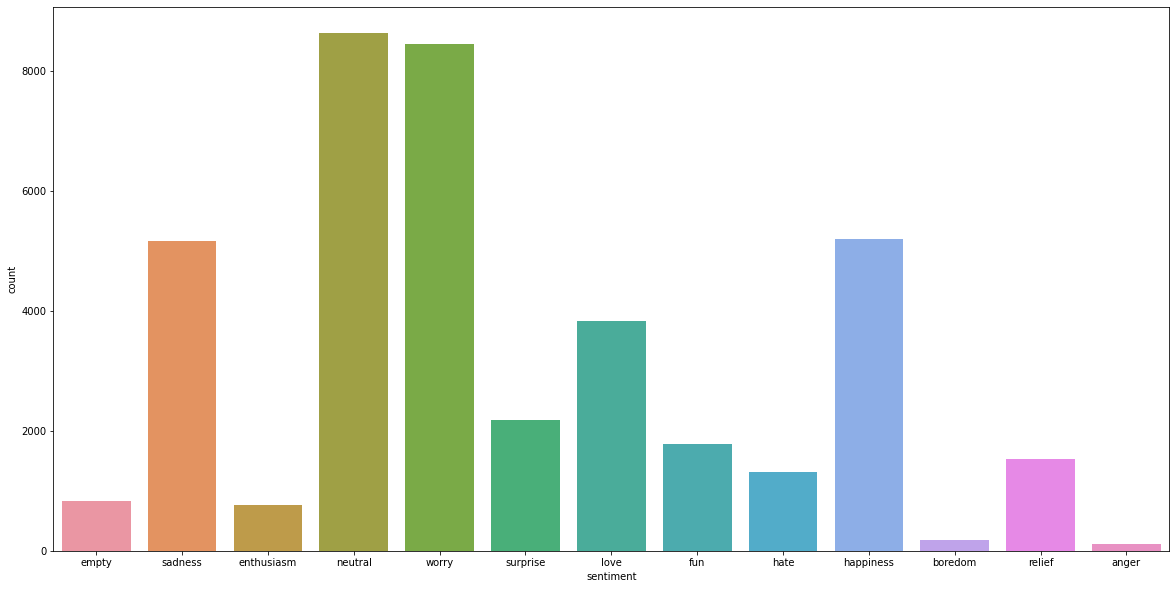

In [5]:
# Plot
plt.figure(figsize=(20, 10))
sns.countplot(x='sentiment',data=df)
plt.show()

In [37]:
# To regroup the smaller portion into a big one
df['sentiment'] = df['sentiment'].replace(['empty','enthusiasm','boredom','anger'],'other')

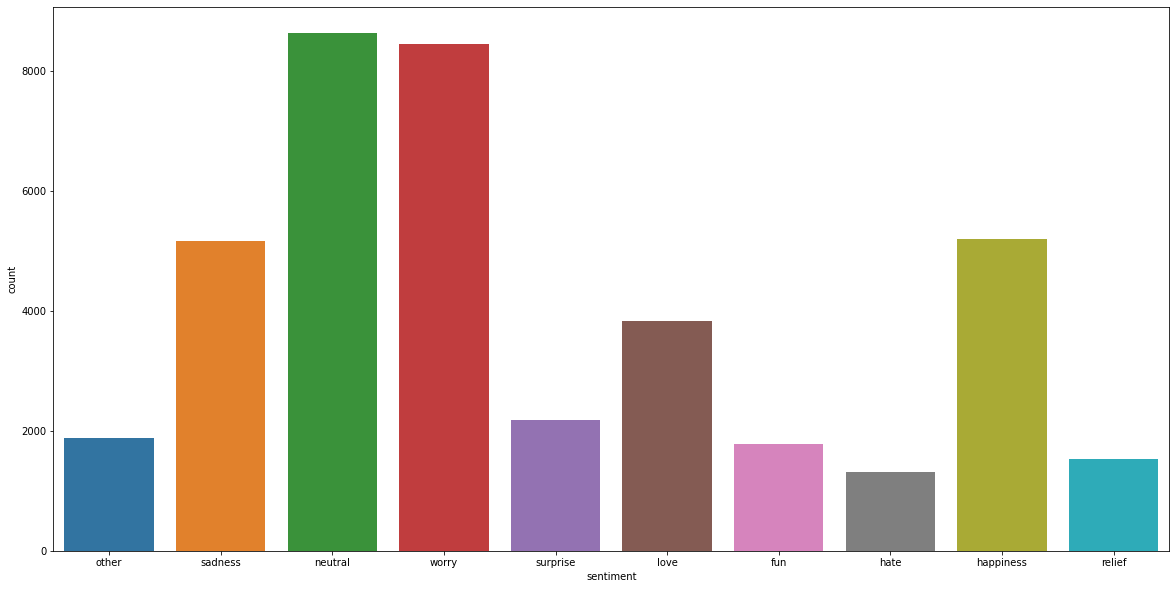

In [7]:
# Plot 2
plt.figure(figsize=(20, 10))
sns.countplot(x='sentiment',data=df)
plt.show()

### Text Cleaning

In [38]:
# We first remove userhandles
df['clean_content']=df['content'].apply(nfx.remove_userhandles)

In [39]:
# We remove urls
df['clean_content'] = df['clean_content'].apply(nfx.remove_urls)

In [40]:
# We then remove stopwords
df['clean_content'] = df['clean_content'].apply(nfx.remove_stopwords)

In [41]:
# We also remove punctuations
df['clean_content'] = df['clean_content'].apply(nfx.remove_punctuations)

In [42]:
# We remove hashtags
df['clean_content'] = df['clean_content'].apply(nfx.remove_hashtags)

In [49]:
# We remove hashtags
df['clean_content'] = df['clean_content'].apply(nfx.remove_shortwords)

In [50]:
# We view the top 10 data samples of our data to see if the modifications worked
df.head(10)

,tweet_id,sentiment,content,clean_content
0,1956967341,other,@tiffanylue i know i was listenin to bad habi...,know listenin habit earlier started freakin
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,1956967789,other,wants to hang out with friends SOON!,wants hang friends SOON
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,want trade Houston tickets will
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,Repinging prom like friends
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",sleep thinking friend want married damn wants ...
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,Hmmm
8,1956969035,sadness,@charviray Charlene my love. I miss you,Charlene love miss
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,sorry Friday


### Keyword Extraction
+ Extract most commonest words per class of emotion

In [22]:
from collections import Counter

In [23]:
# We extract keywords and return them in a dictionnary
def extract_keywords(text, num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [44]:
# list of sentiment
sentiment_list = df['sentiment'].unique().tolist()

# Other keywords

In [51]:
other_list = df[df['sentiment'] == "other"] ['clean_content'].tolist()

In [52]:
# Other Document
other_docx = ' '.join(other_list)

In [53]:
# Extract Keywords
keyword_other = extract_keywords(other_docx)

In [54]:
keyword_other

{'work': 86,
 'like': 75,
 'bored': 69,
 'today': 66,
 'want': 63,
 'good': 61,
 'going': 58,
 'know': 55,
 'cant': 53,
 'need': 45,
 'home': 45,
 'time': 44,
 'night': 39,
 'think': 39,
 'morning': 37,
 'sleep': 36,
 'dont': 31,
 'tomorrow': 30,
 'twitter': 28,
 'great': 28,
 'right': 28,
 'school': 26,
 'tired': 26,
 'wait': 26,
 'weekend': 26,
 'haha': 24,
 'days': 23,
 'Good': 23,
 'hope': 23,
 'wanna': 22,
 'feel': 22,
 'tonight': 22,
 'people': 22,
 'looking': 22,
 'week': 21,
 'getting': 21,
 'working': 20,
 'thats': 20,
 'gonna': 20,
 'come': 20,
 'love': 19,
 'boring': 19,
 'ready': 19,
 'wish': 19,
 'waiting': 19,
 'nice': 19,
 'thanks': 19,
 'find': 19,
 'look': 18,
 'miss': 18}

In [30]:
# Plot
def plot_most_common_words(mydict):
    df_01 = pd.DataFrame(mydict.items(), columns=['tokens','count'])
    plt.figure(figsize=(50,30))
    sns.barplot(x='tokens',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

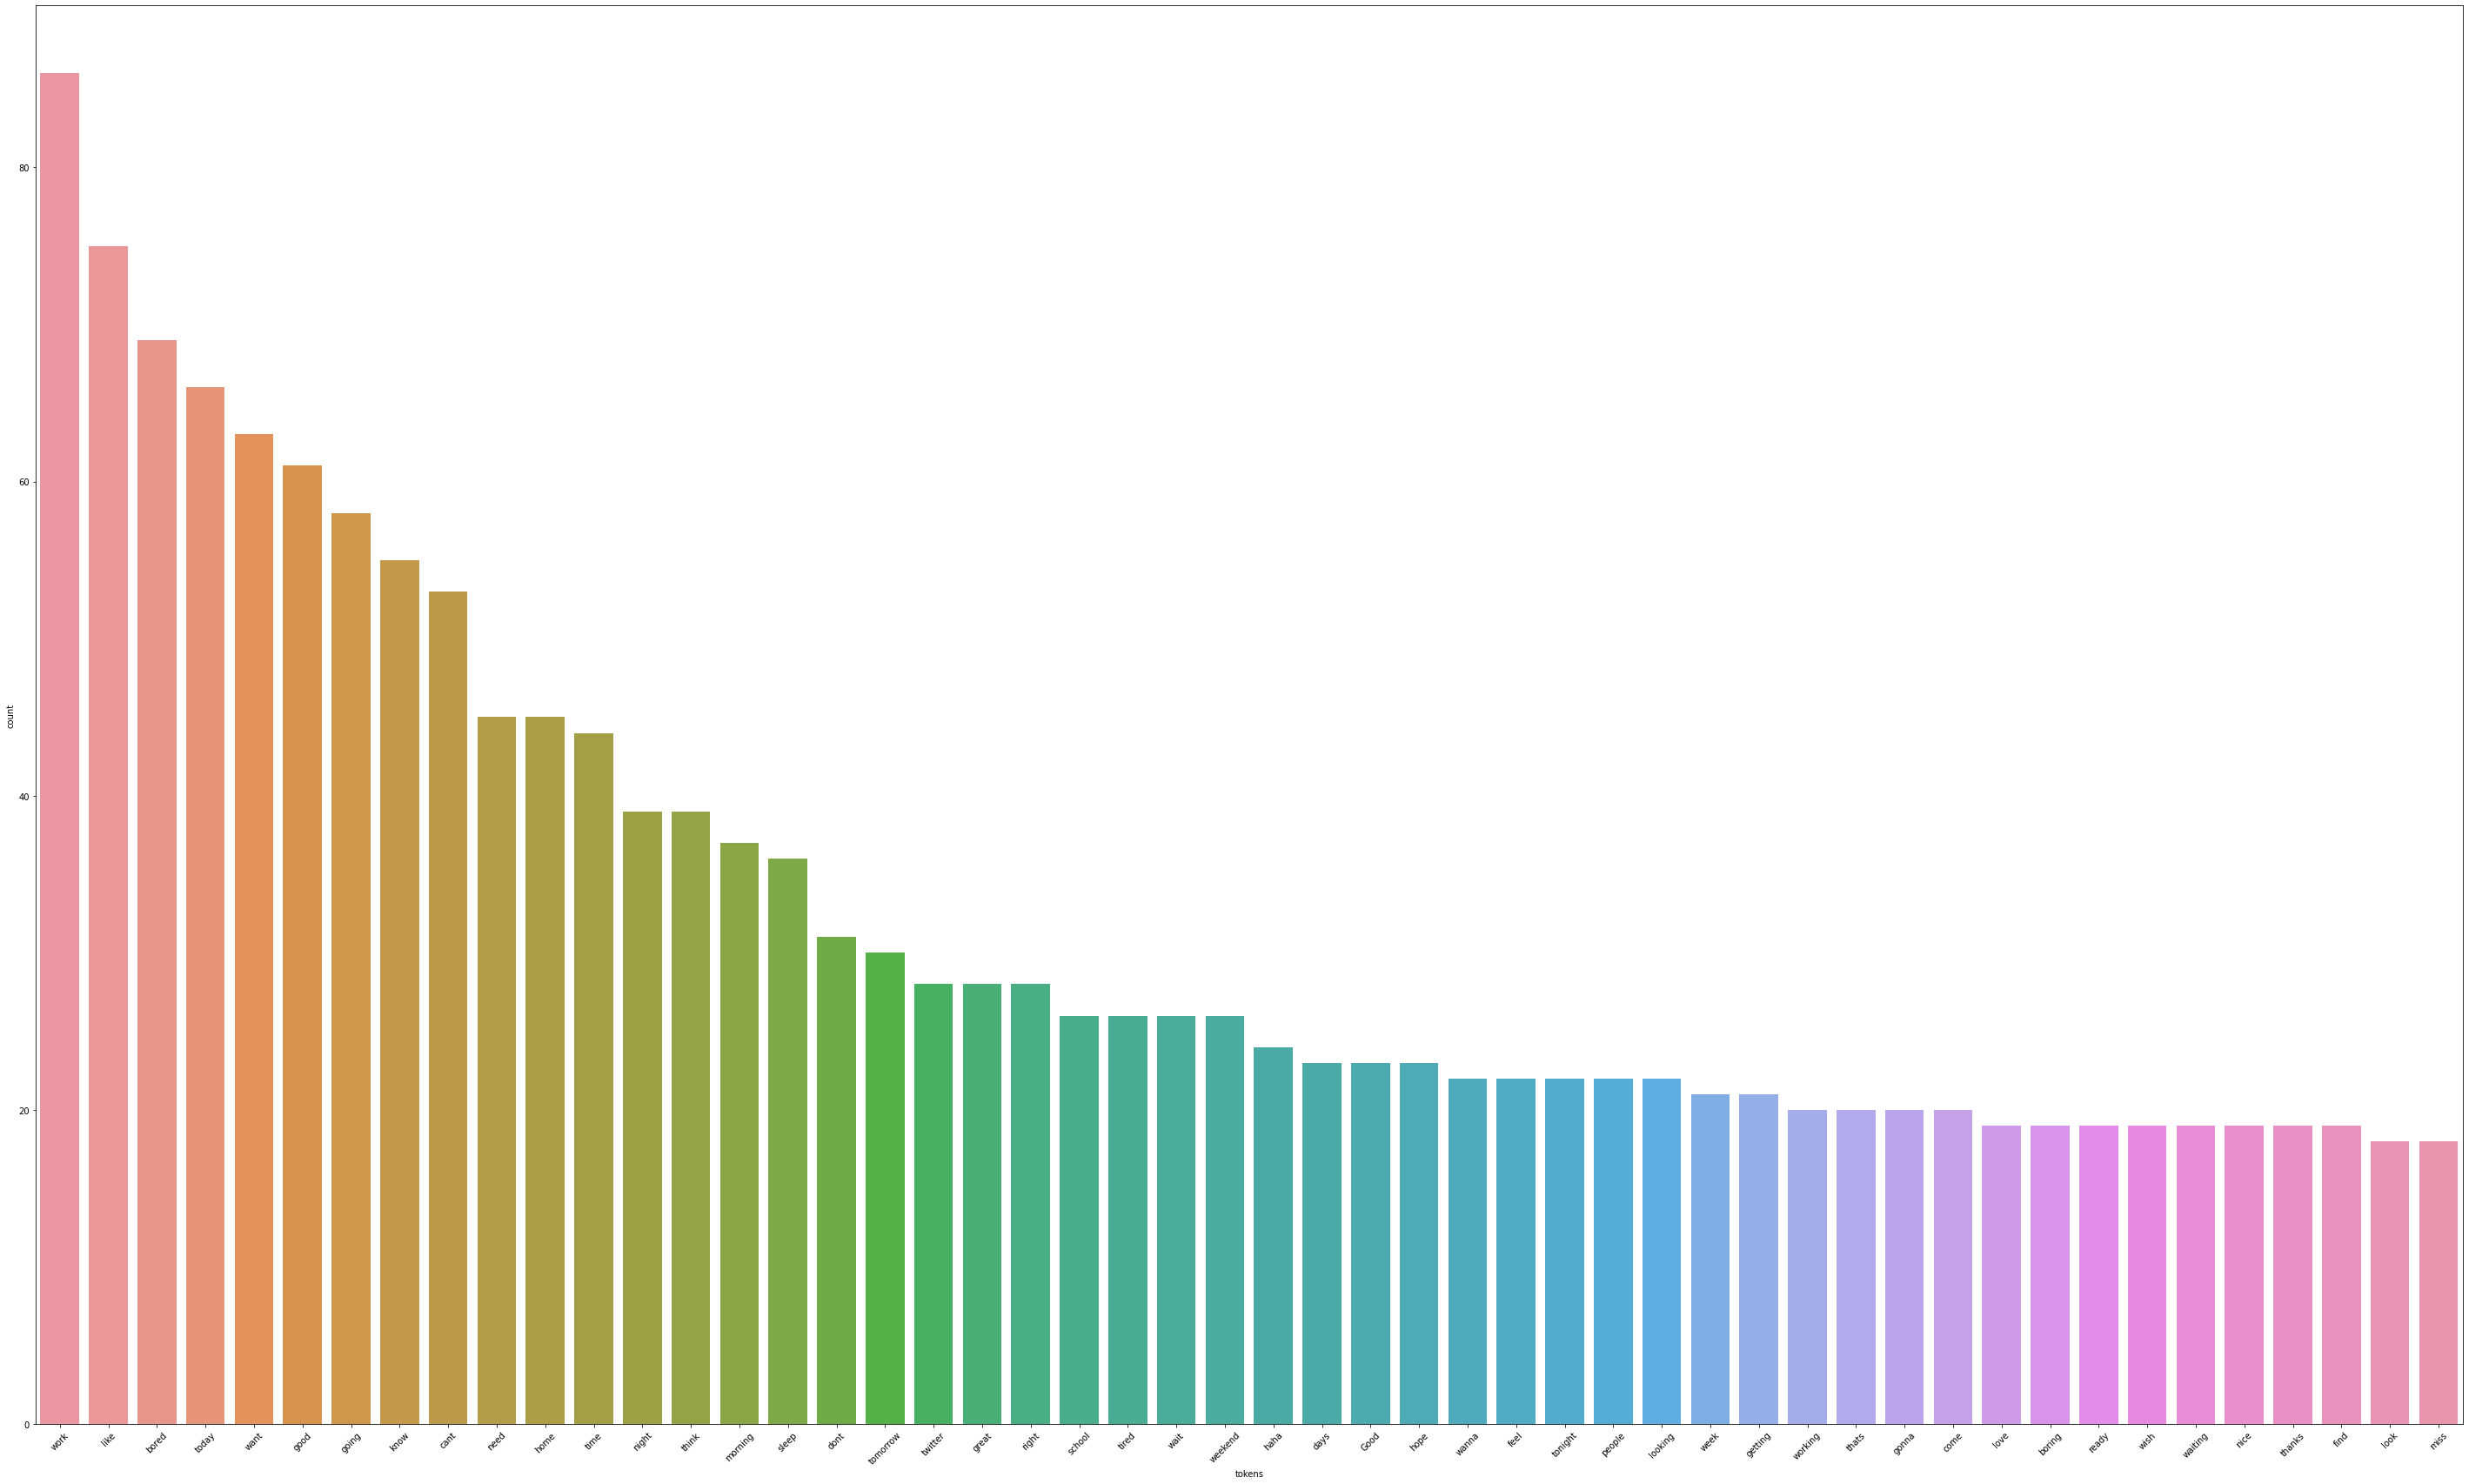

In [55]:
# We plot the most common words using the last defined function
plot_most_common_words(keyword_other)

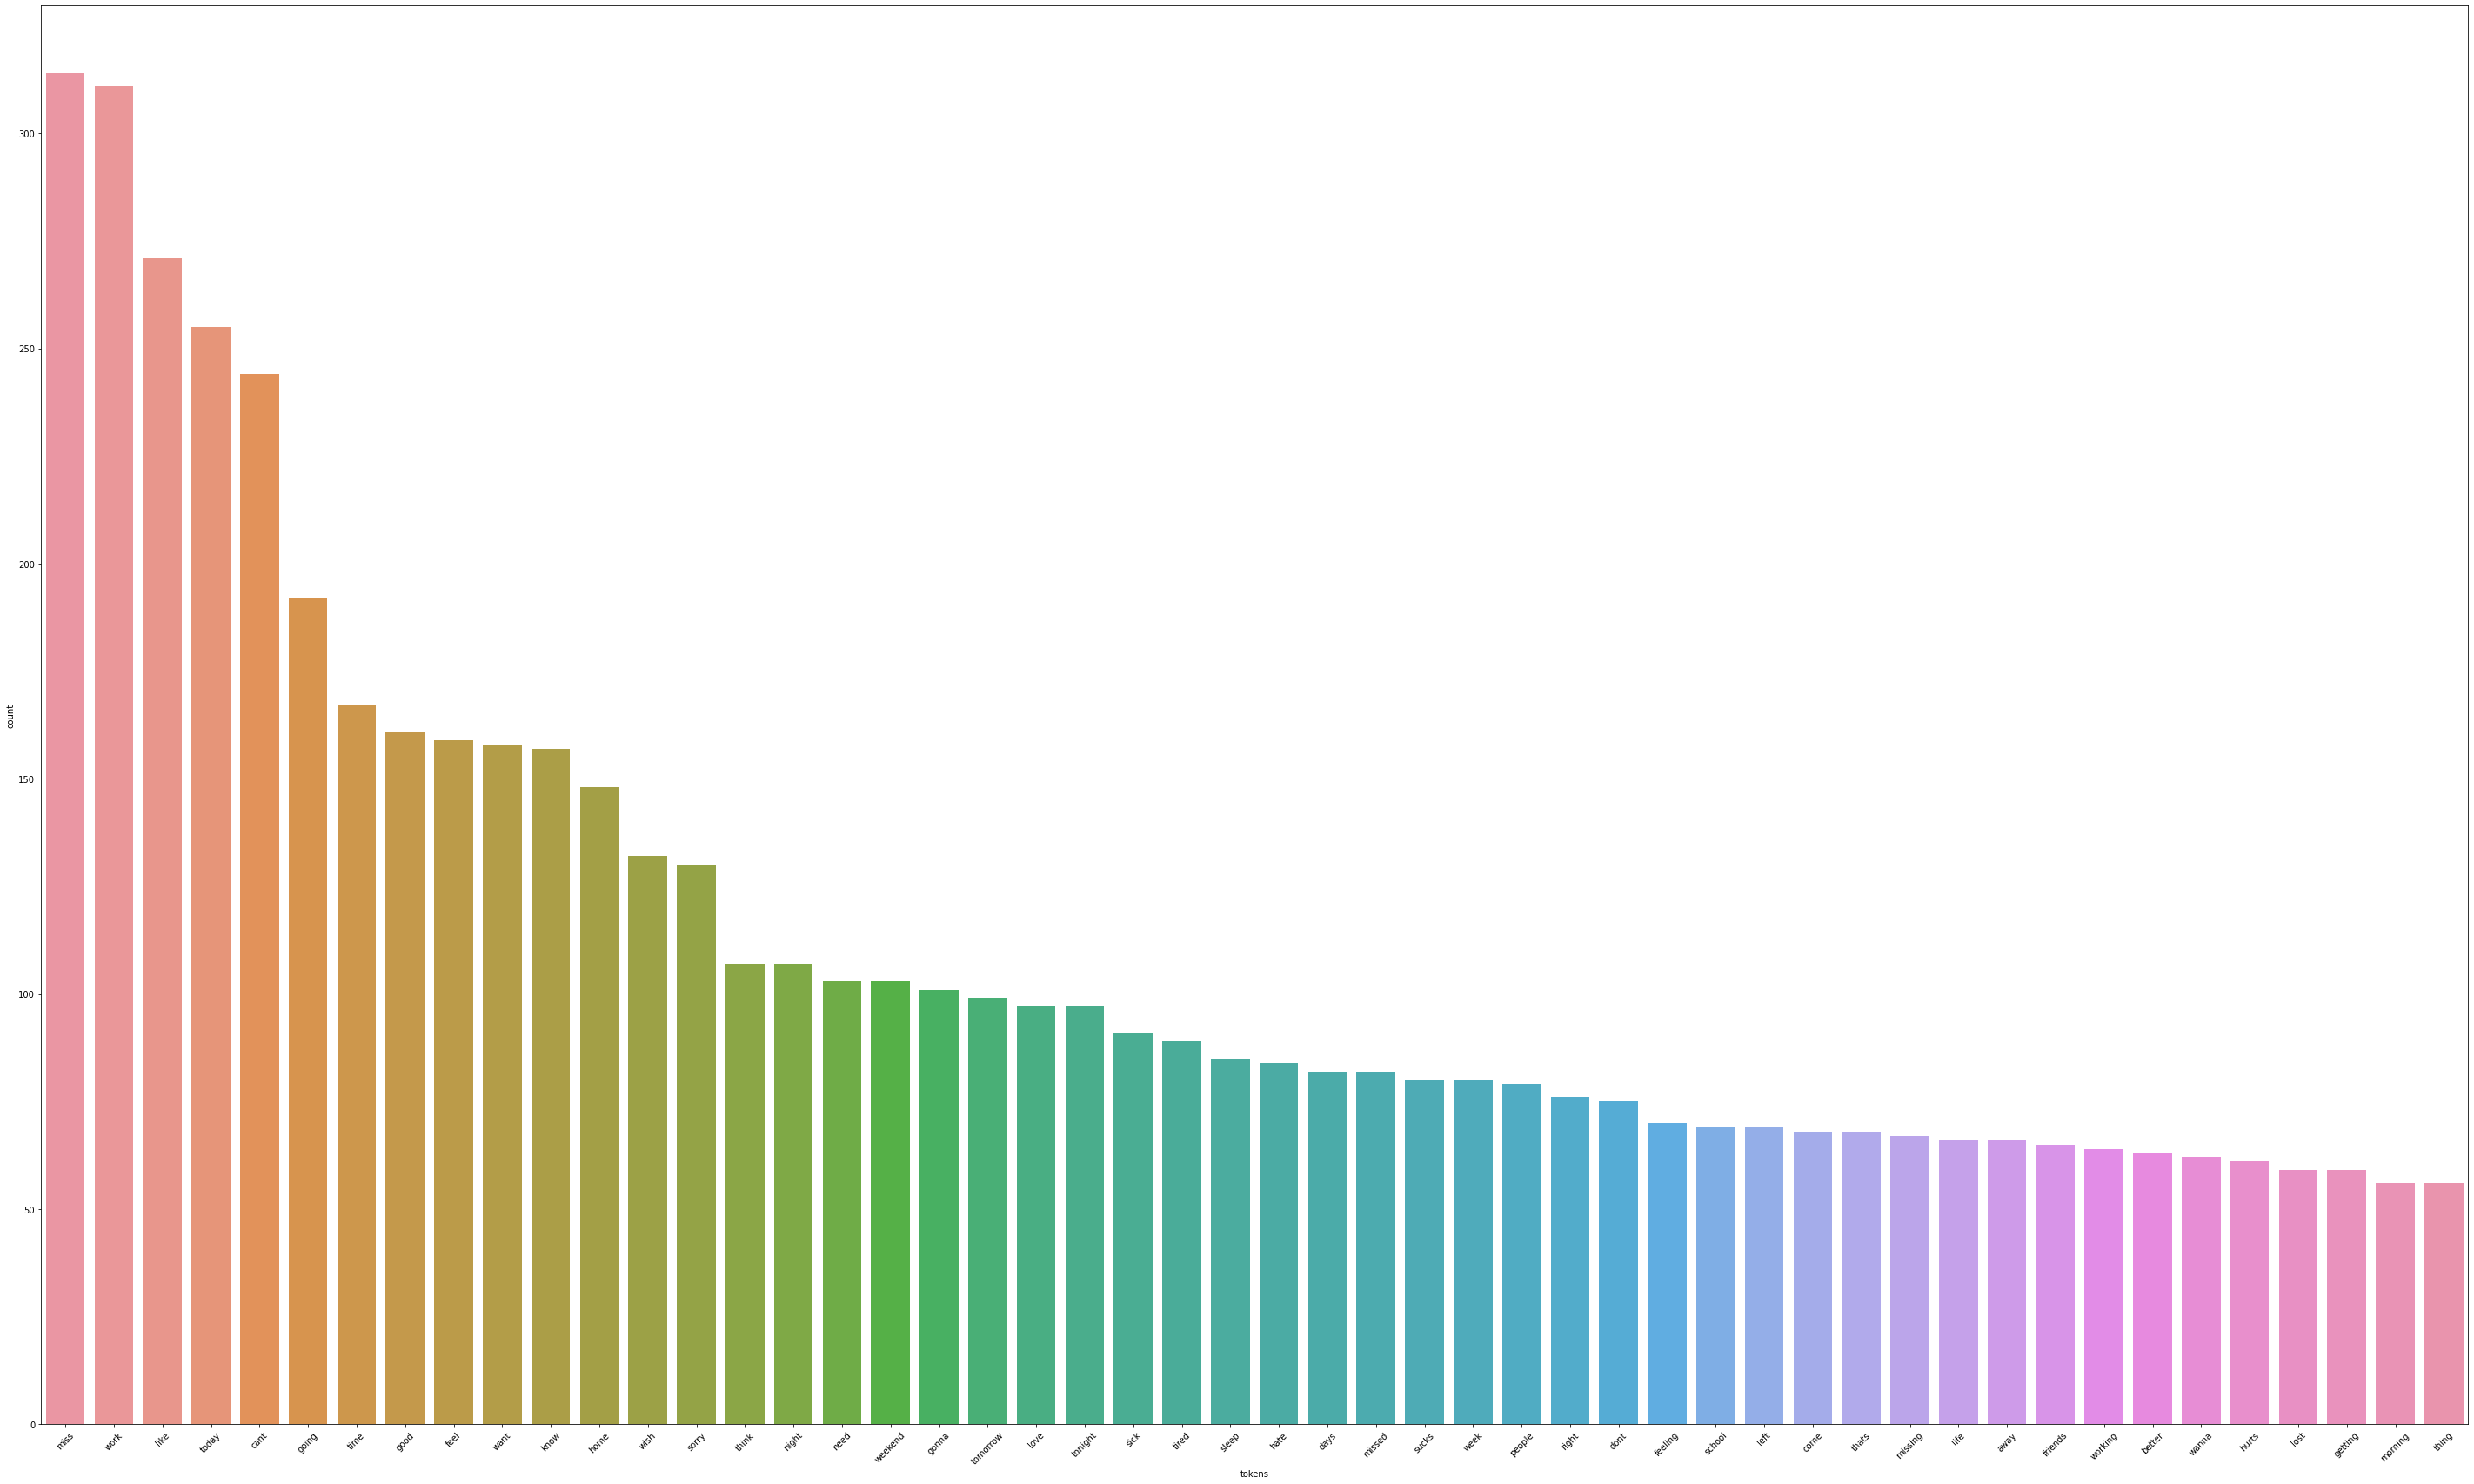

In [56]:
sadness_list = df[df['sentiment'] == "sadness"] ['clean_content'].tolist()
# Other Document
sadness_docx = ' '.join(sadness_list)
# Extract Keywords
keyword_sadness = extract_keywords(sadness_docx)
# We plot the most common words using the last defined function
plot_most_common_words(keyword_sadness)

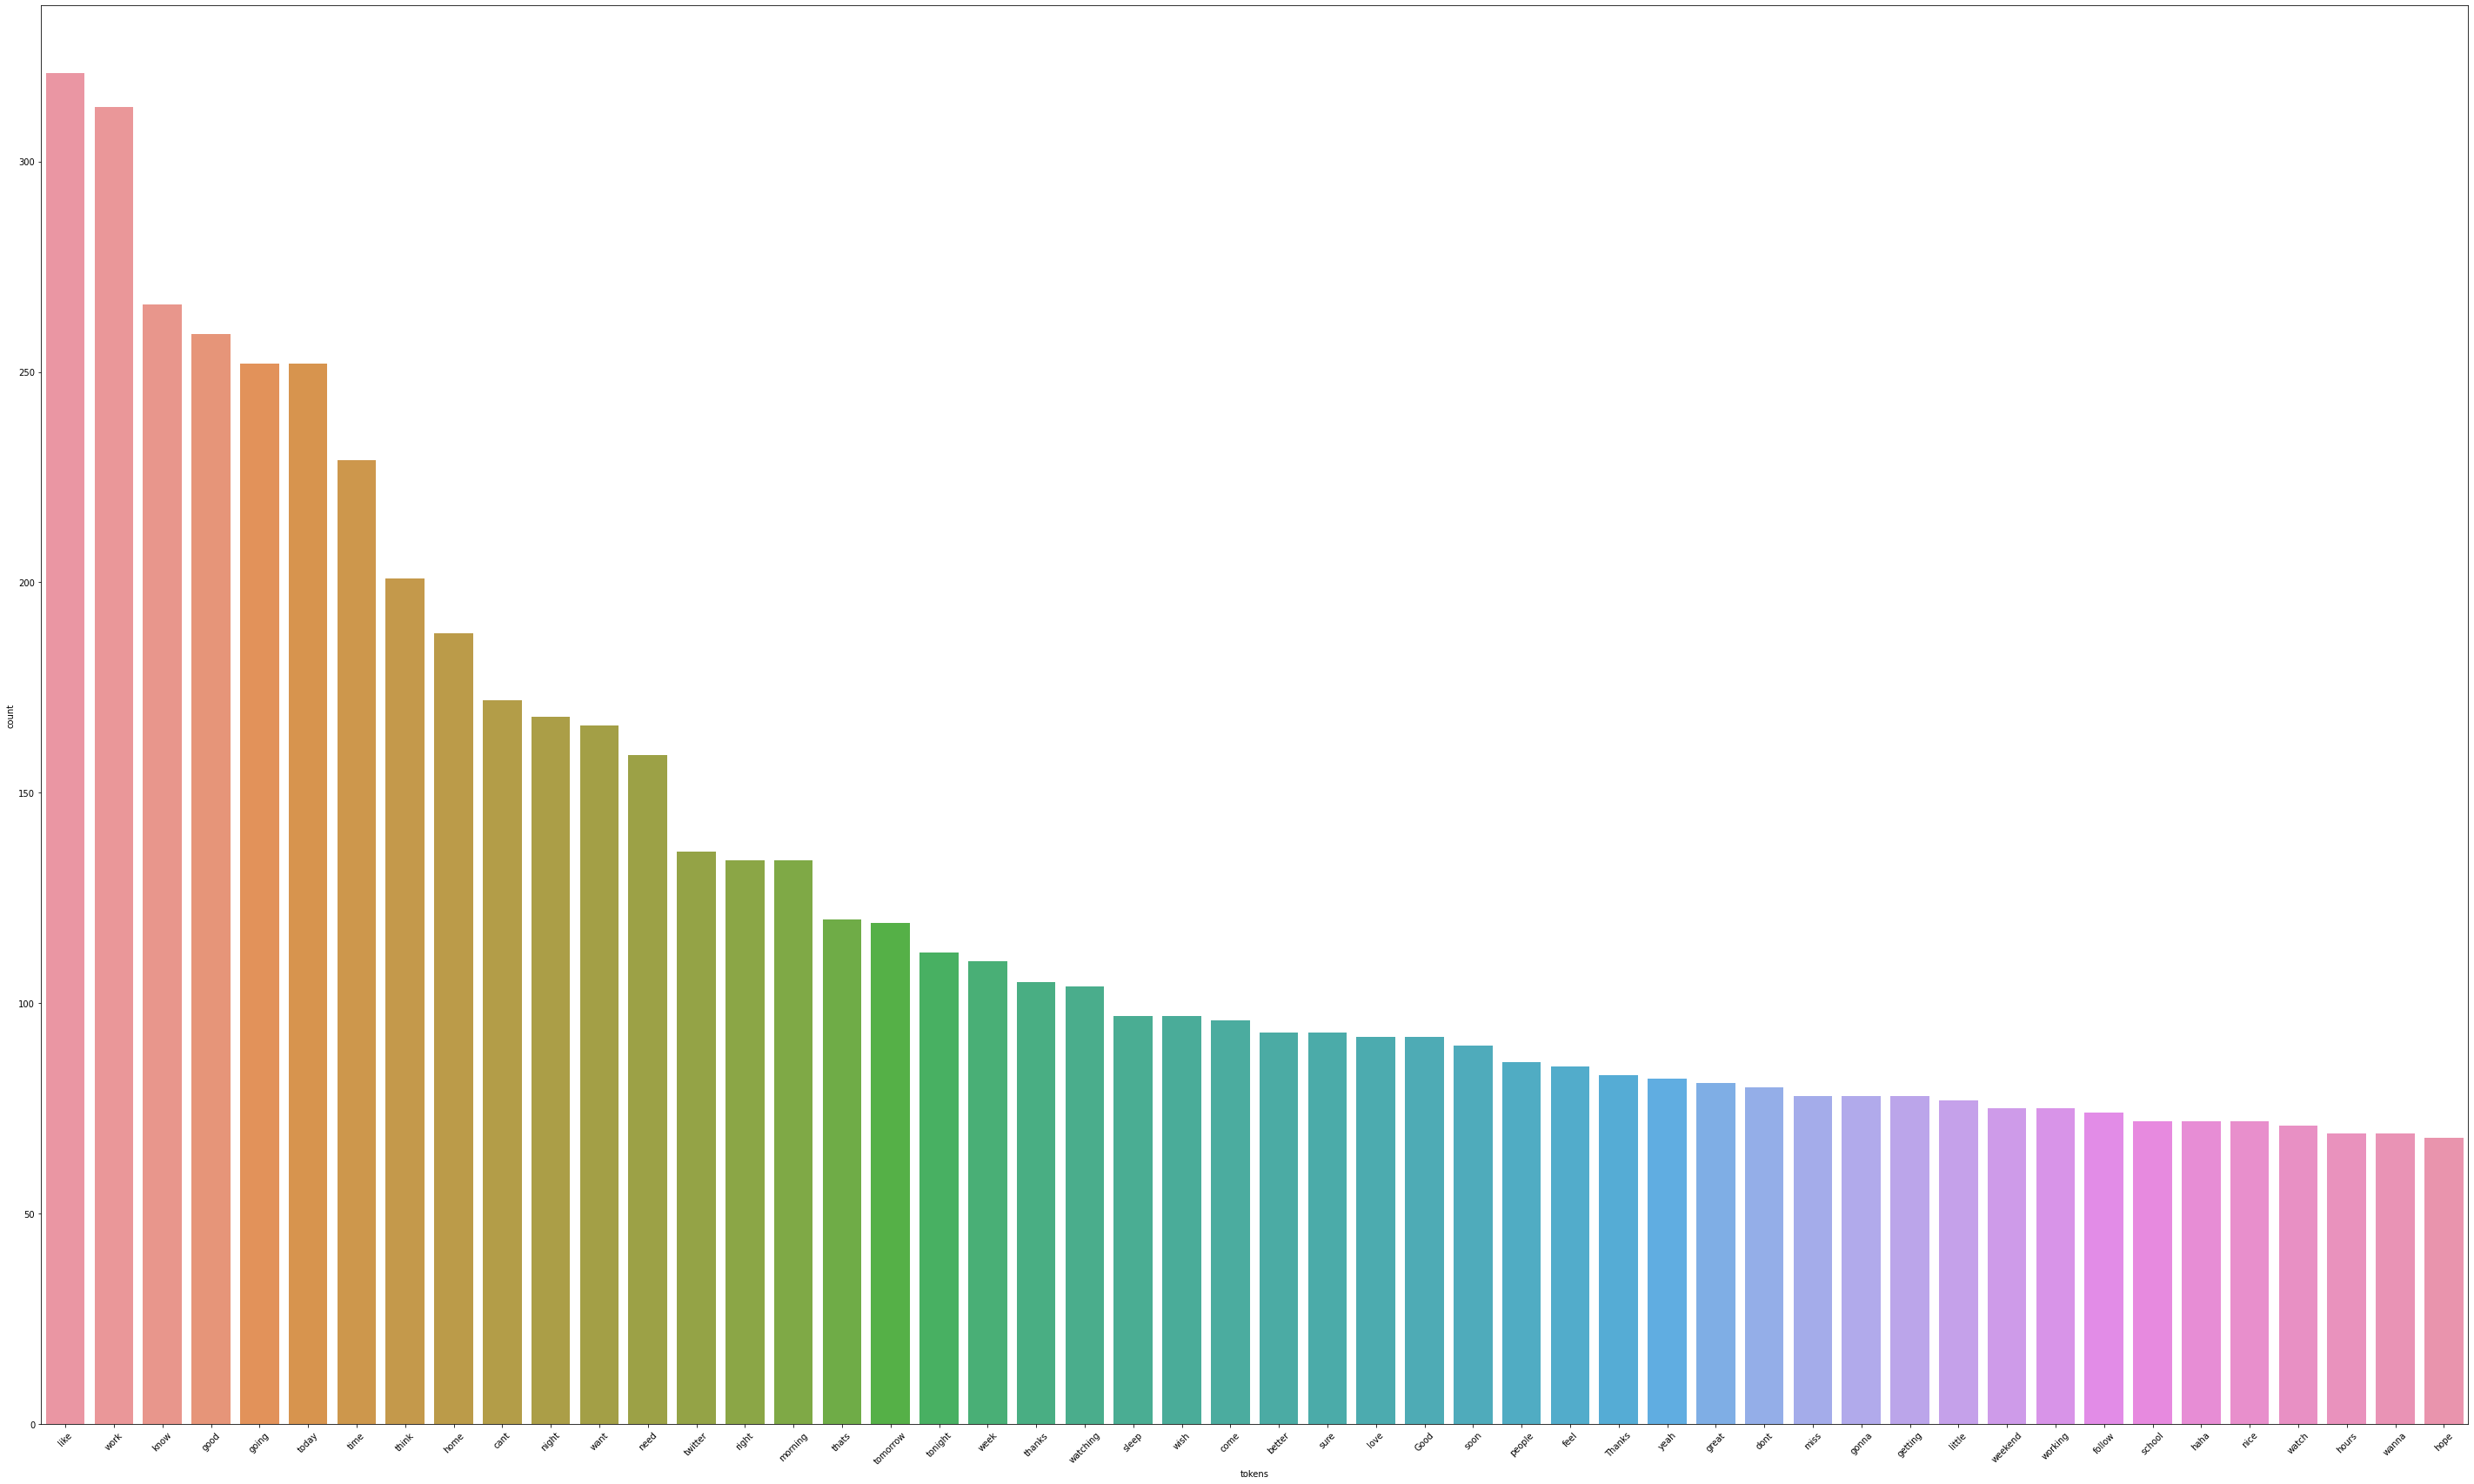

In [57]:
neutral_list = df[df['sentiment'] == "neutral"] ['clean_content'].tolist()
# Other Document
neutral_docx = ' '.join(neutral_list)
# Extract Keywords
keyword_neutral = extract_keywords(neutral_docx)
# We plot the most common words using the last defined function
plot_most_common_words(keyword_neutral)

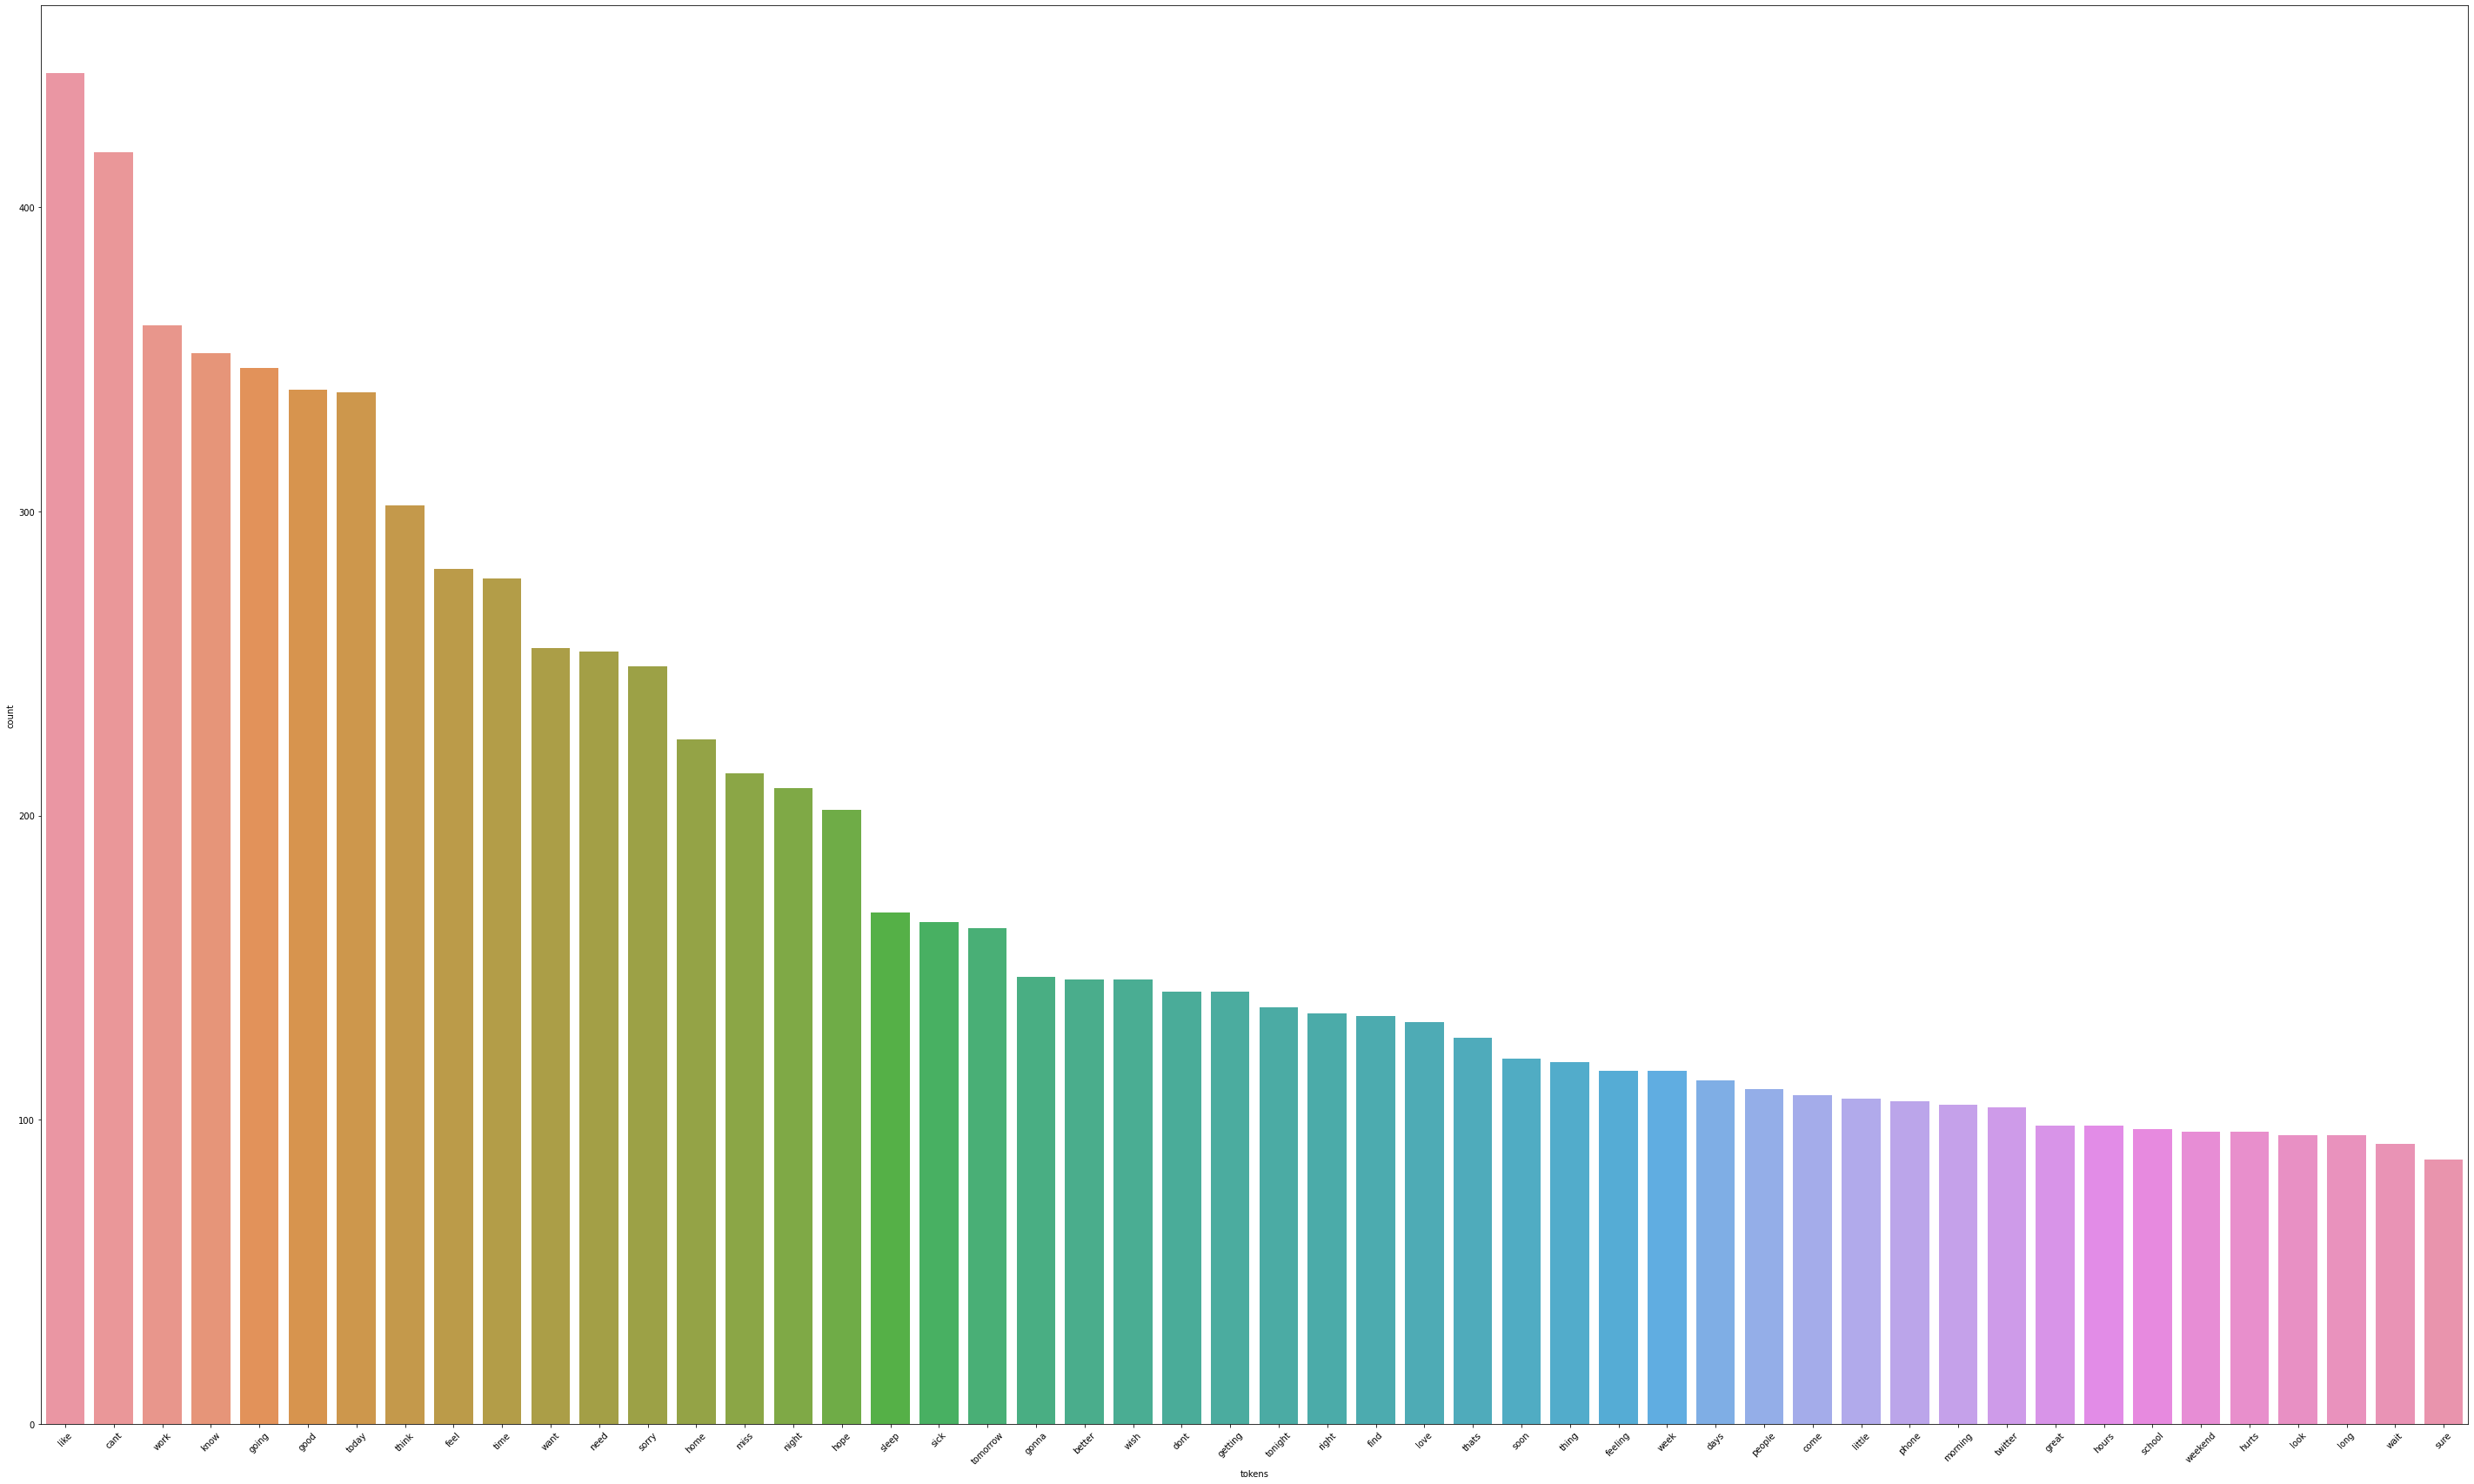

In [58]:
worry_list = df[df['sentiment'] == "worry"] ['clean_content'].tolist()
# Other Document
worry_docx = ' '.join(worry_list)
# Extract Keywords
keyword_worry = extract_keywords(worry_docx)
# We plot the most common words using the last defined function
plot_most_common_words(keyword_worry)

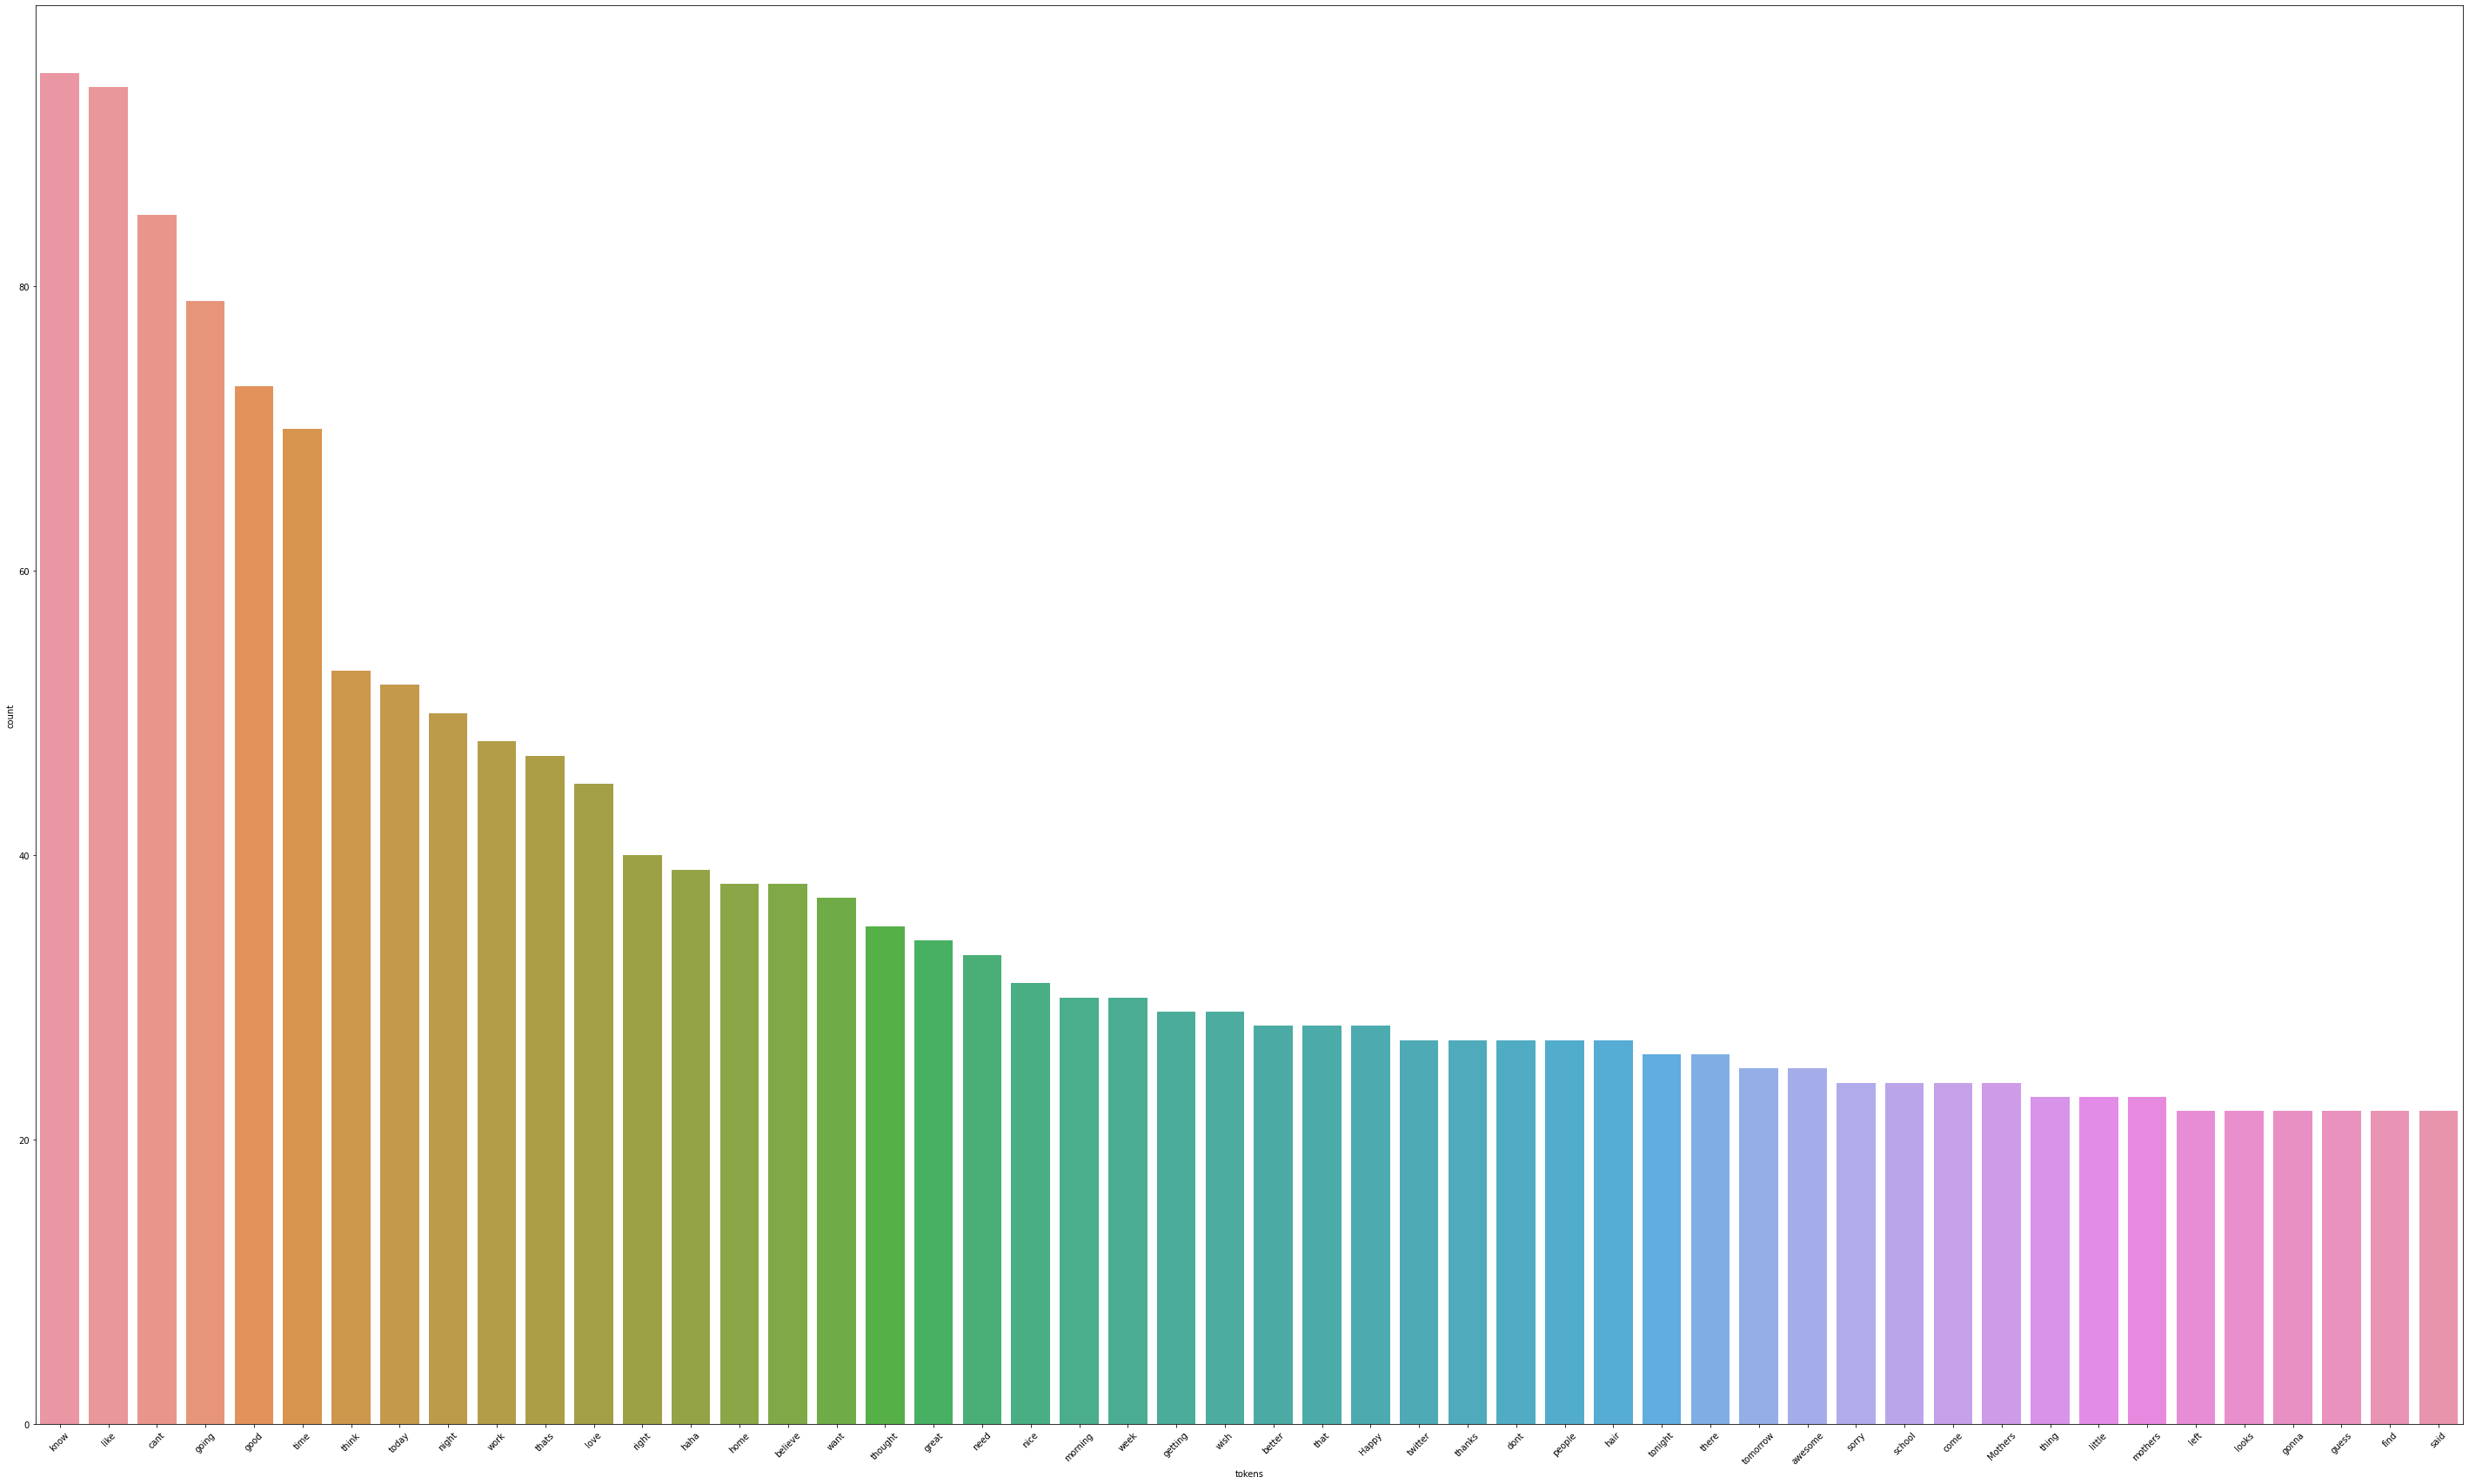

In [59]:
surprise_list = df[df['sentiment'] == "surprise"] ['clean_content'].tolist()
# Other Document
surprise_docx = ' '.join(surprise_list)
# Extract Keywords
keyword_surprise = extract_keywords(surprise_docx)
# We plot the most common words using the last defined function
plot_most_common_words(keyword_surprise)

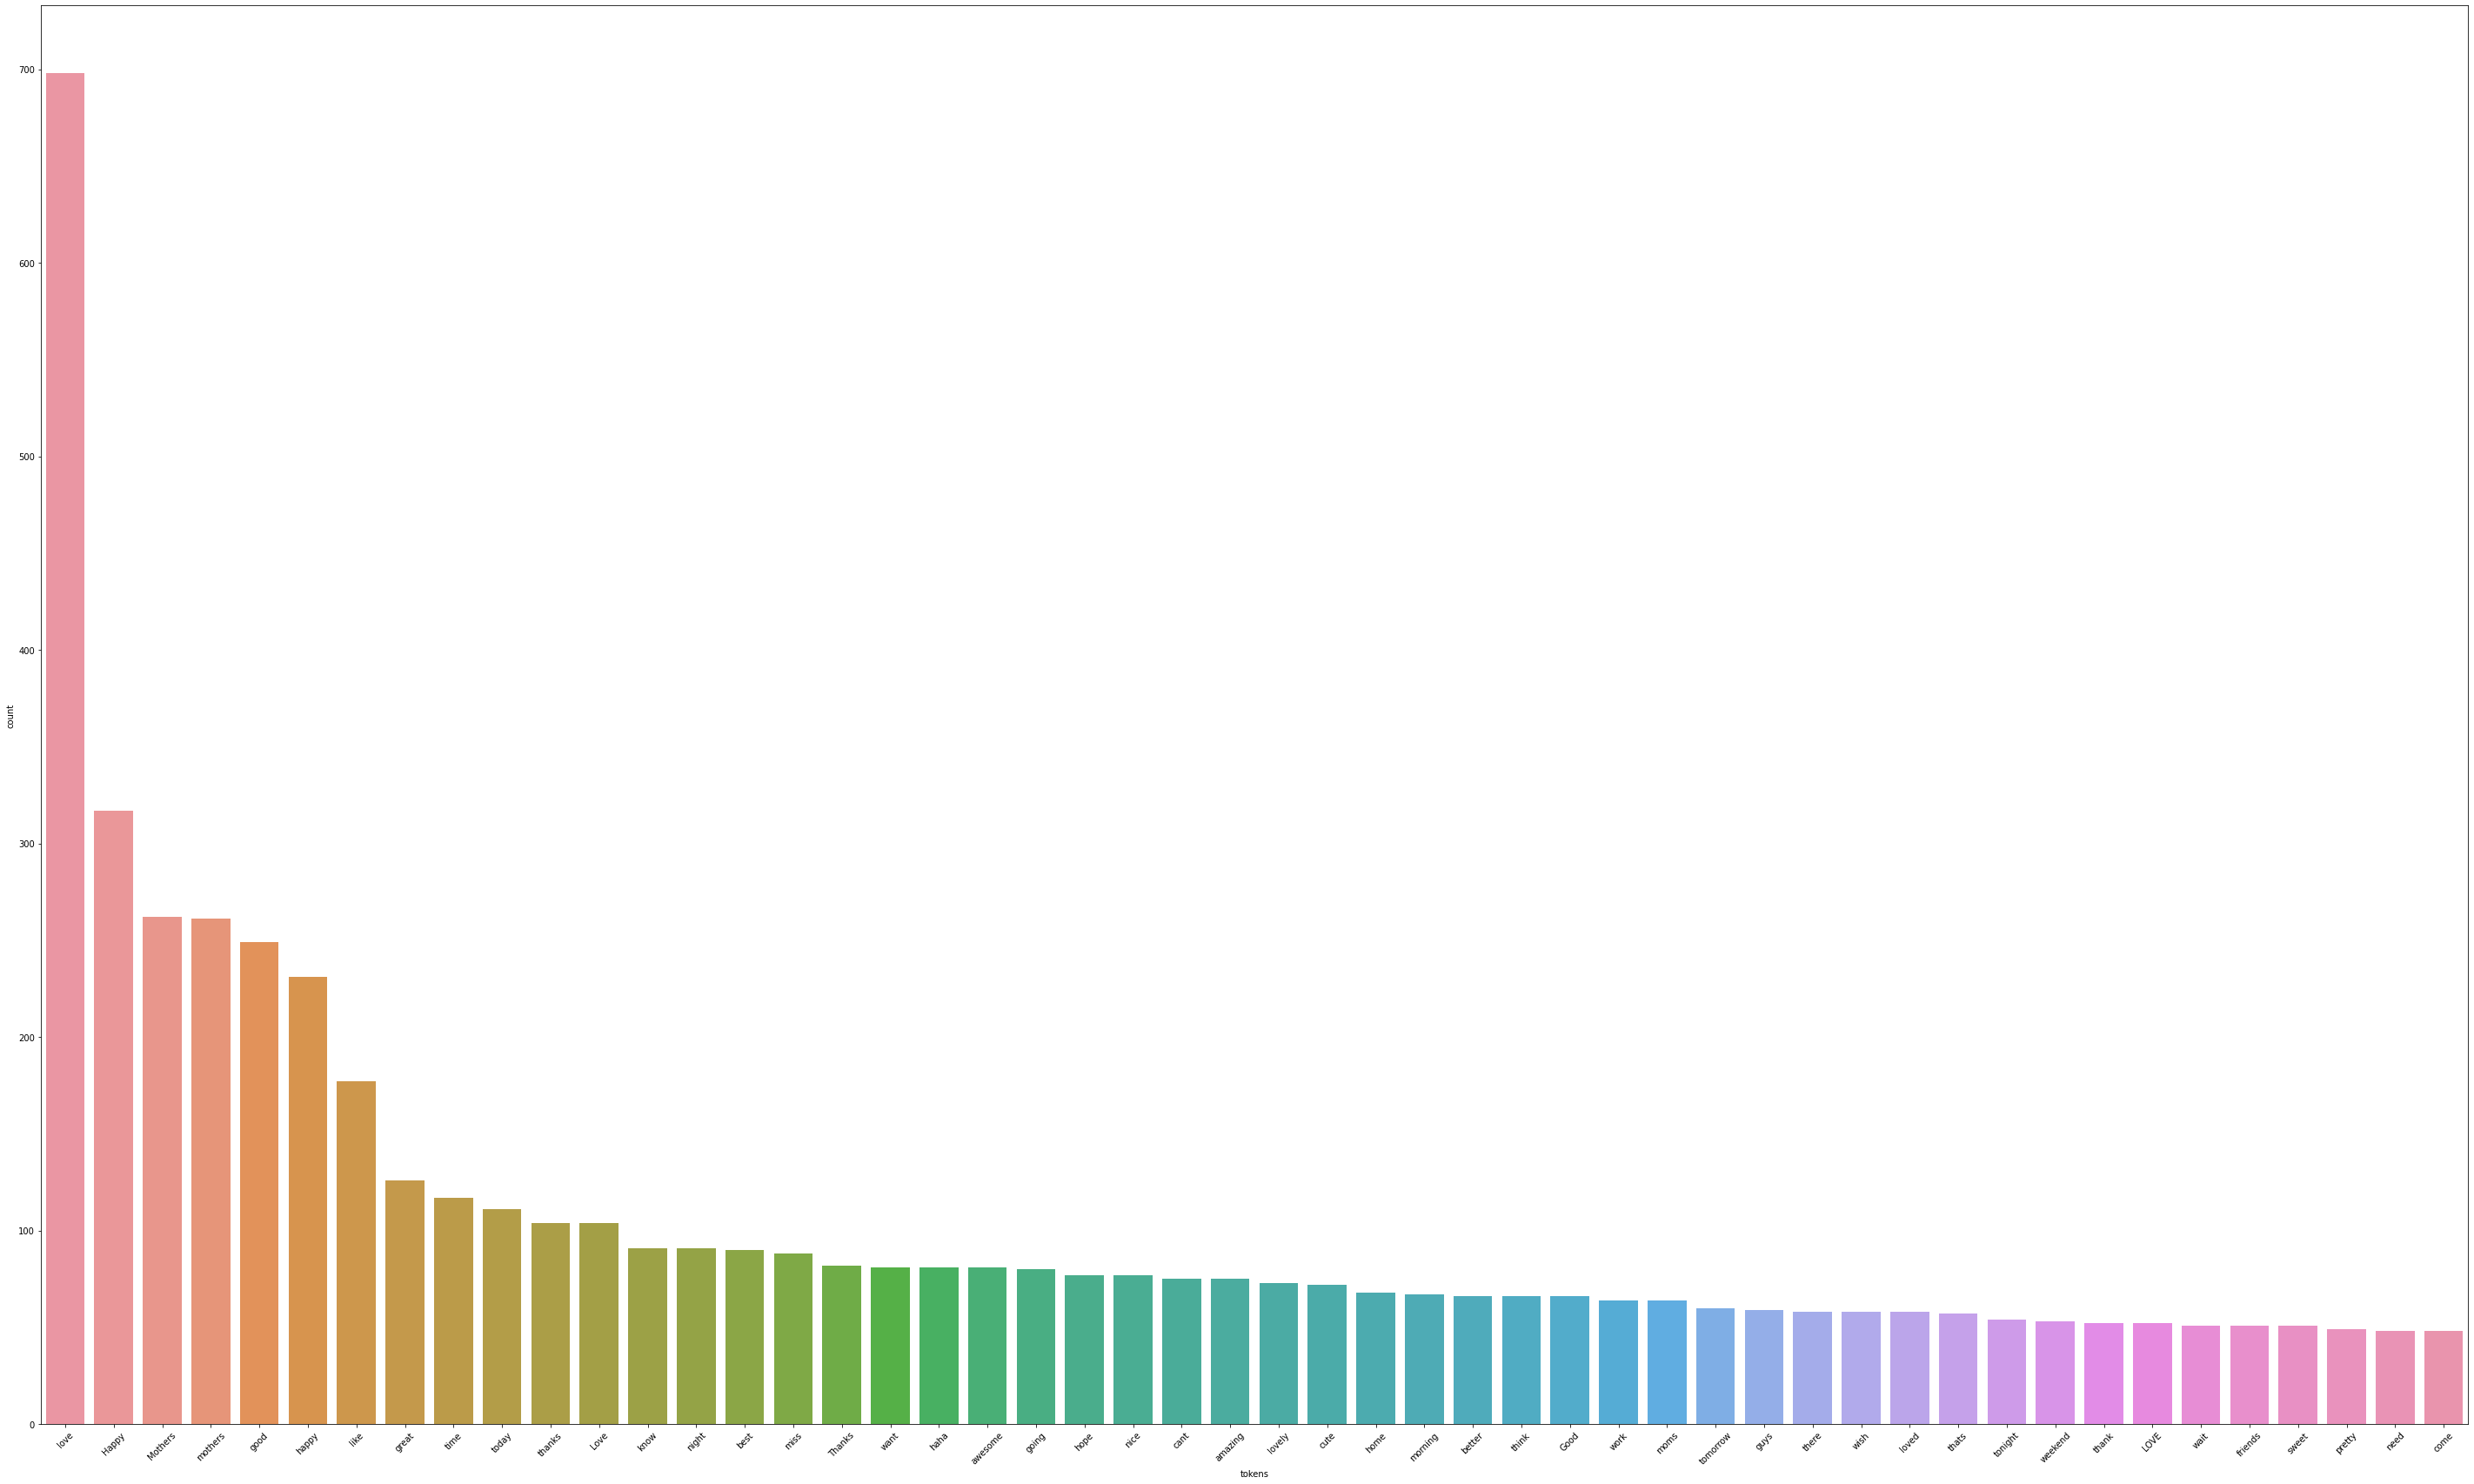

In [60]:
love_list = df[df['sentiment'] == "love"] ['clean_content'].tolist()
# Other Document
love_docx = ' '.join(love_list)
# Extract Keywords
keyword_love = extract_keywords(love_docx)
# We plot the most common words using the last defined function
plot_most_common_words(keyword_love)

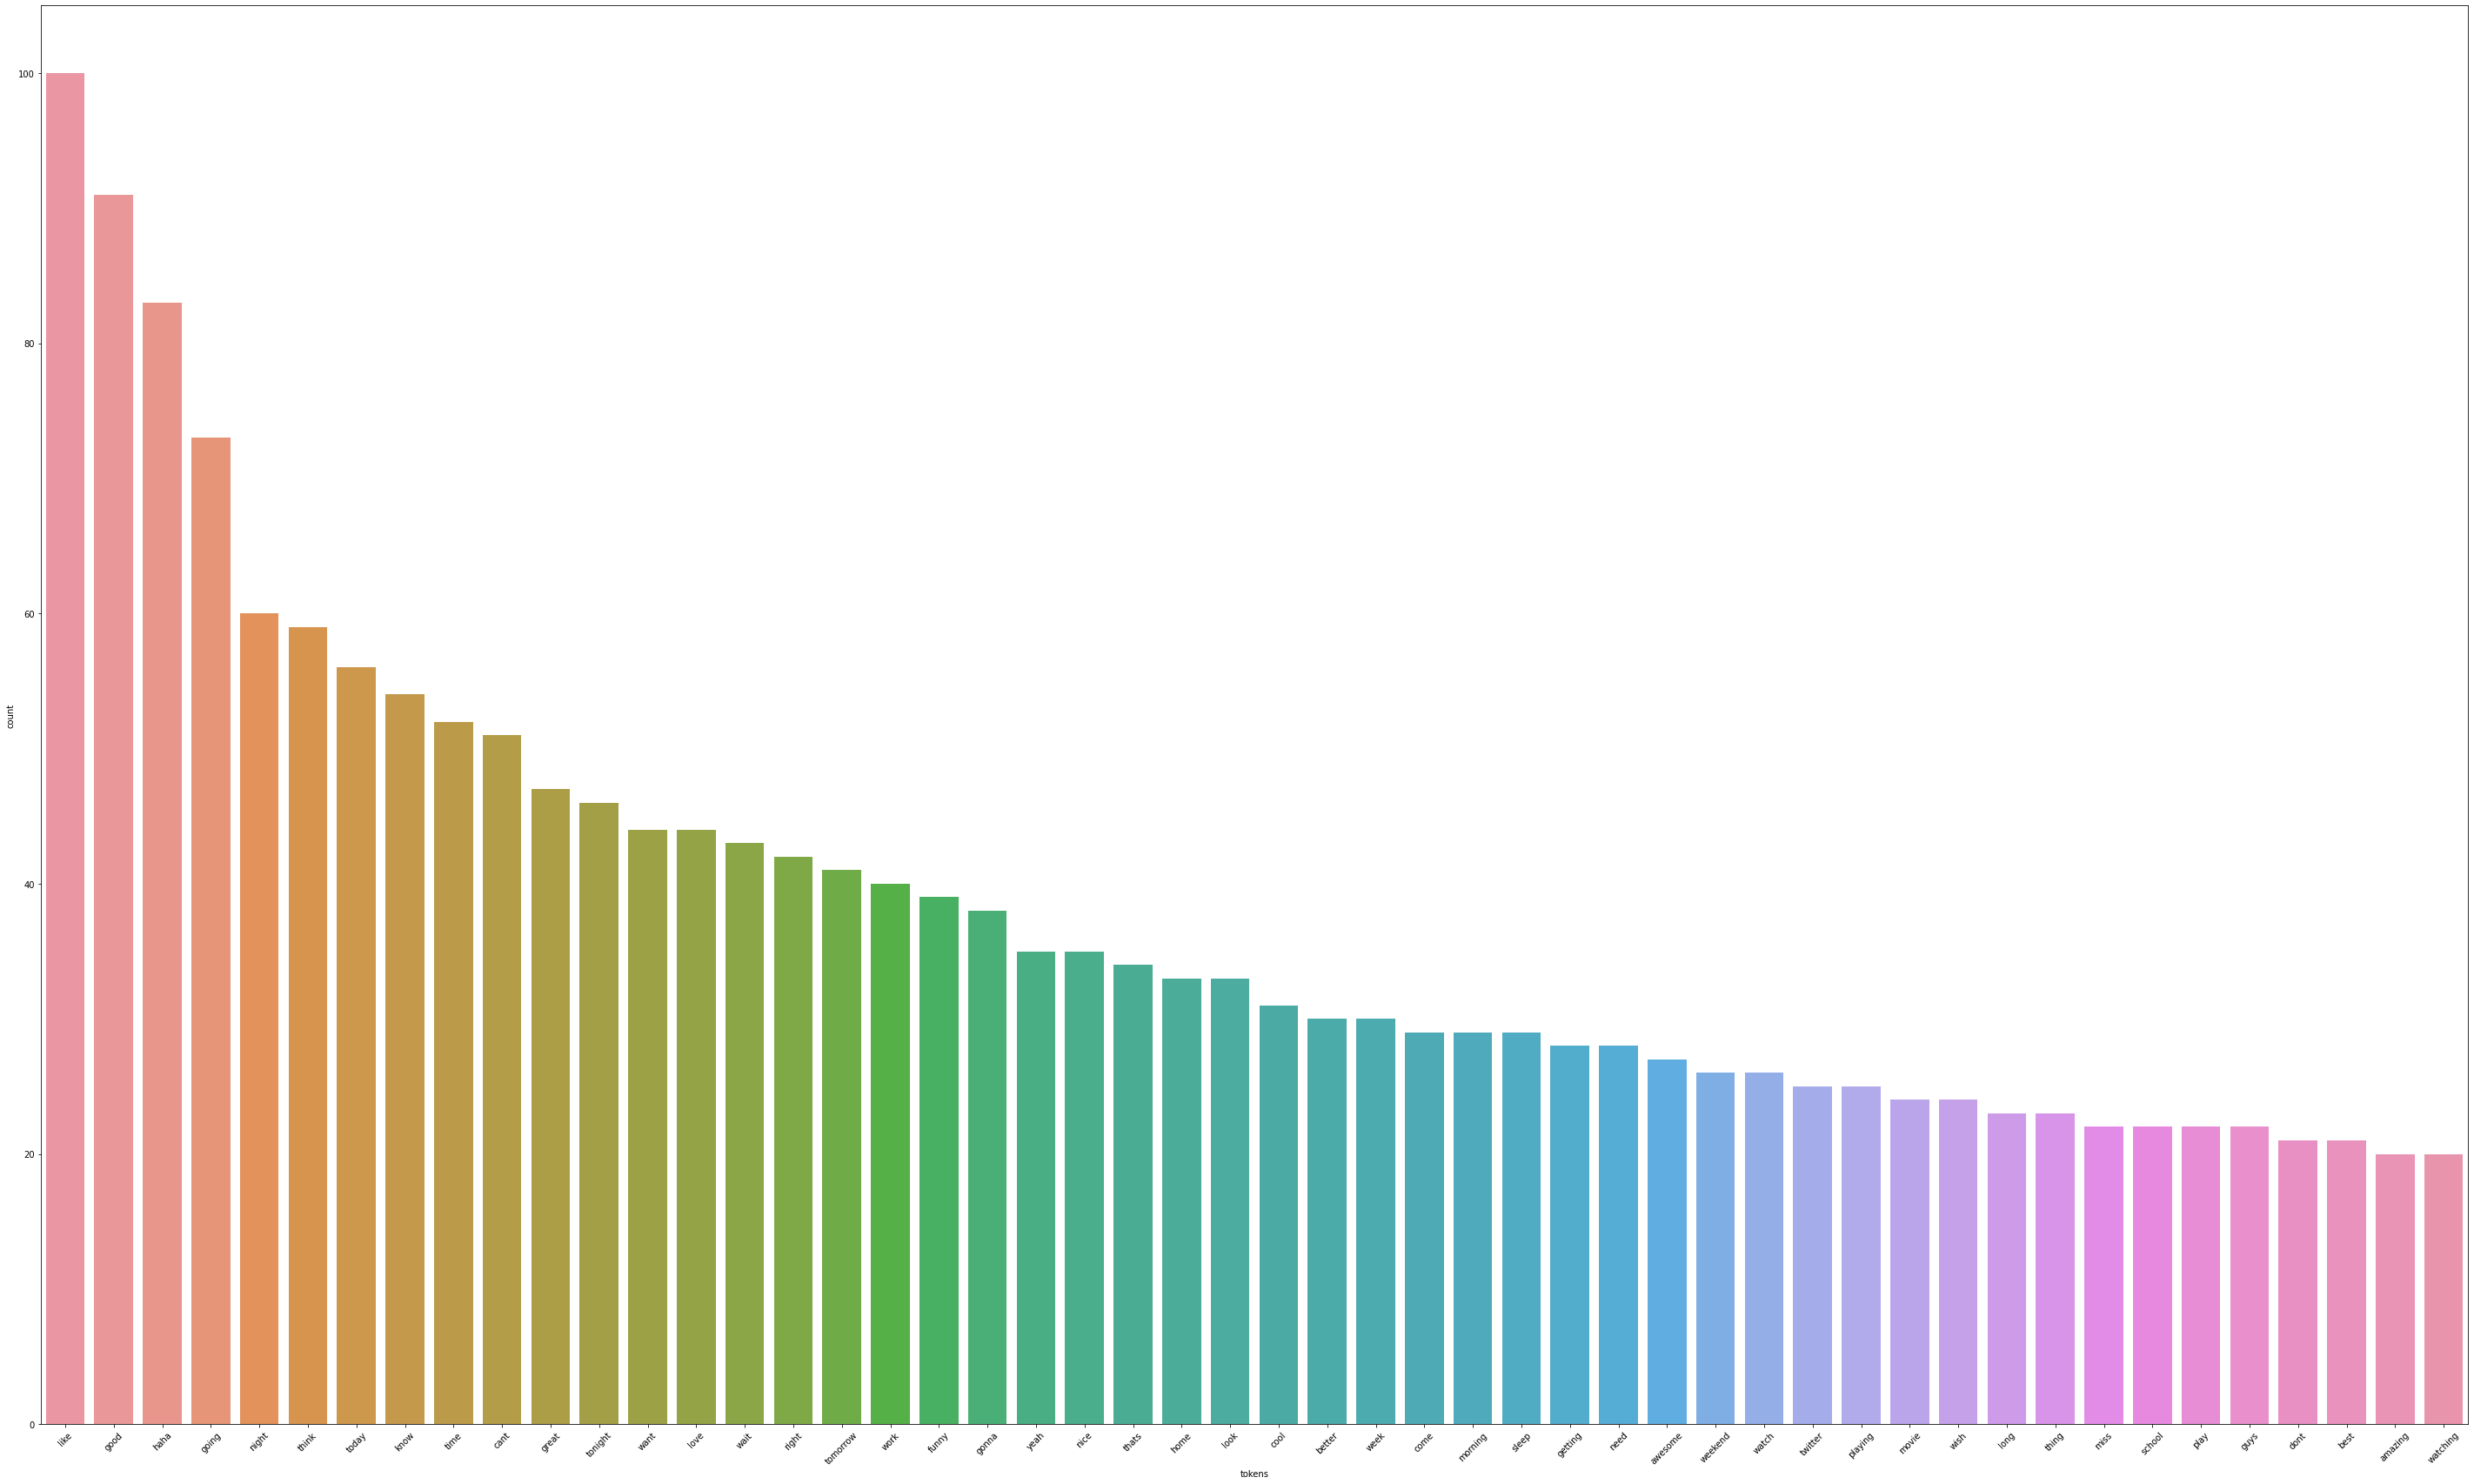

In [61]:
fun_list = df[df['sentiment'] == "fun"] ['clean_content'].tolist()
# Other Document
fun_docx = ' '.join(fun_list)
# Extract Keywords
keyword_fun = extract_keywords(fun_docx)
# We plot the most common words using the last defined function
plot_most_common_words(keyword_fun)

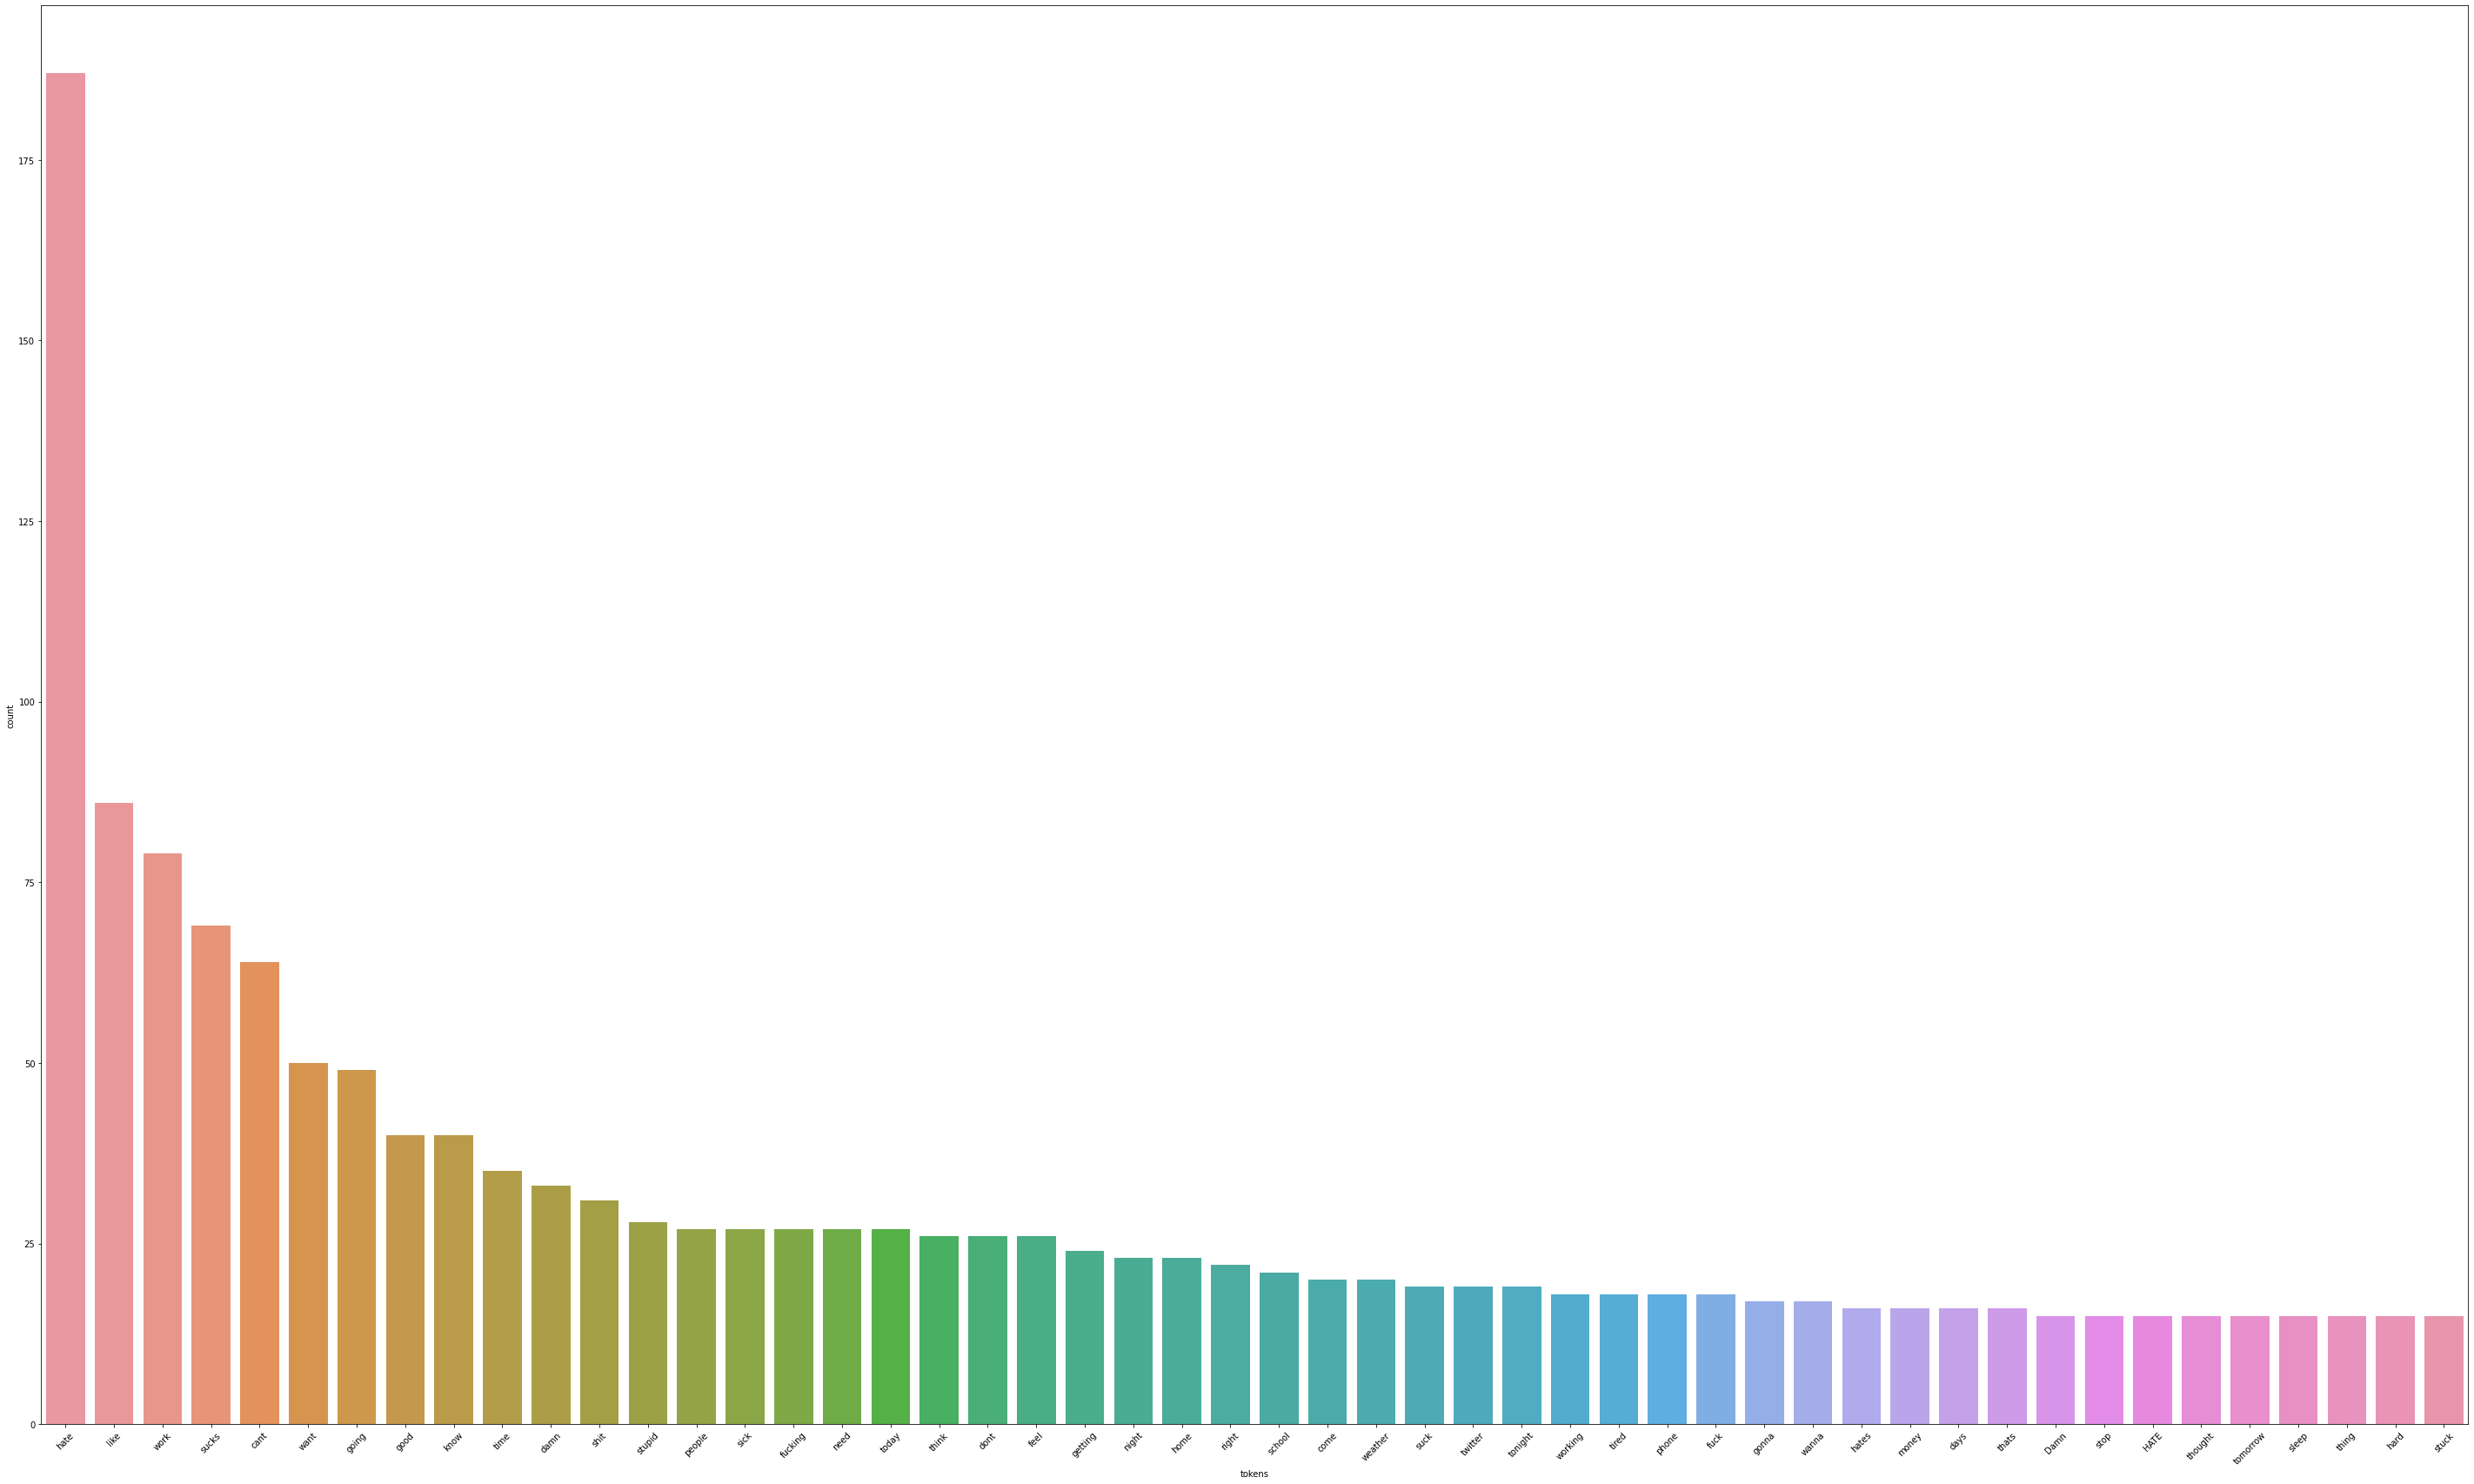

In [62]:
hate_list = df[df['sentiment'] == "hate"] ['clean_content'].tolist()
# Other Document
hate_docx = ' '.join(hate_list)
# Extract Keywords
keyword_hate = extract_keywords(hate_docx)
# We plot the most common words using the last defined function
plot_most_common_words(keyword_hate)

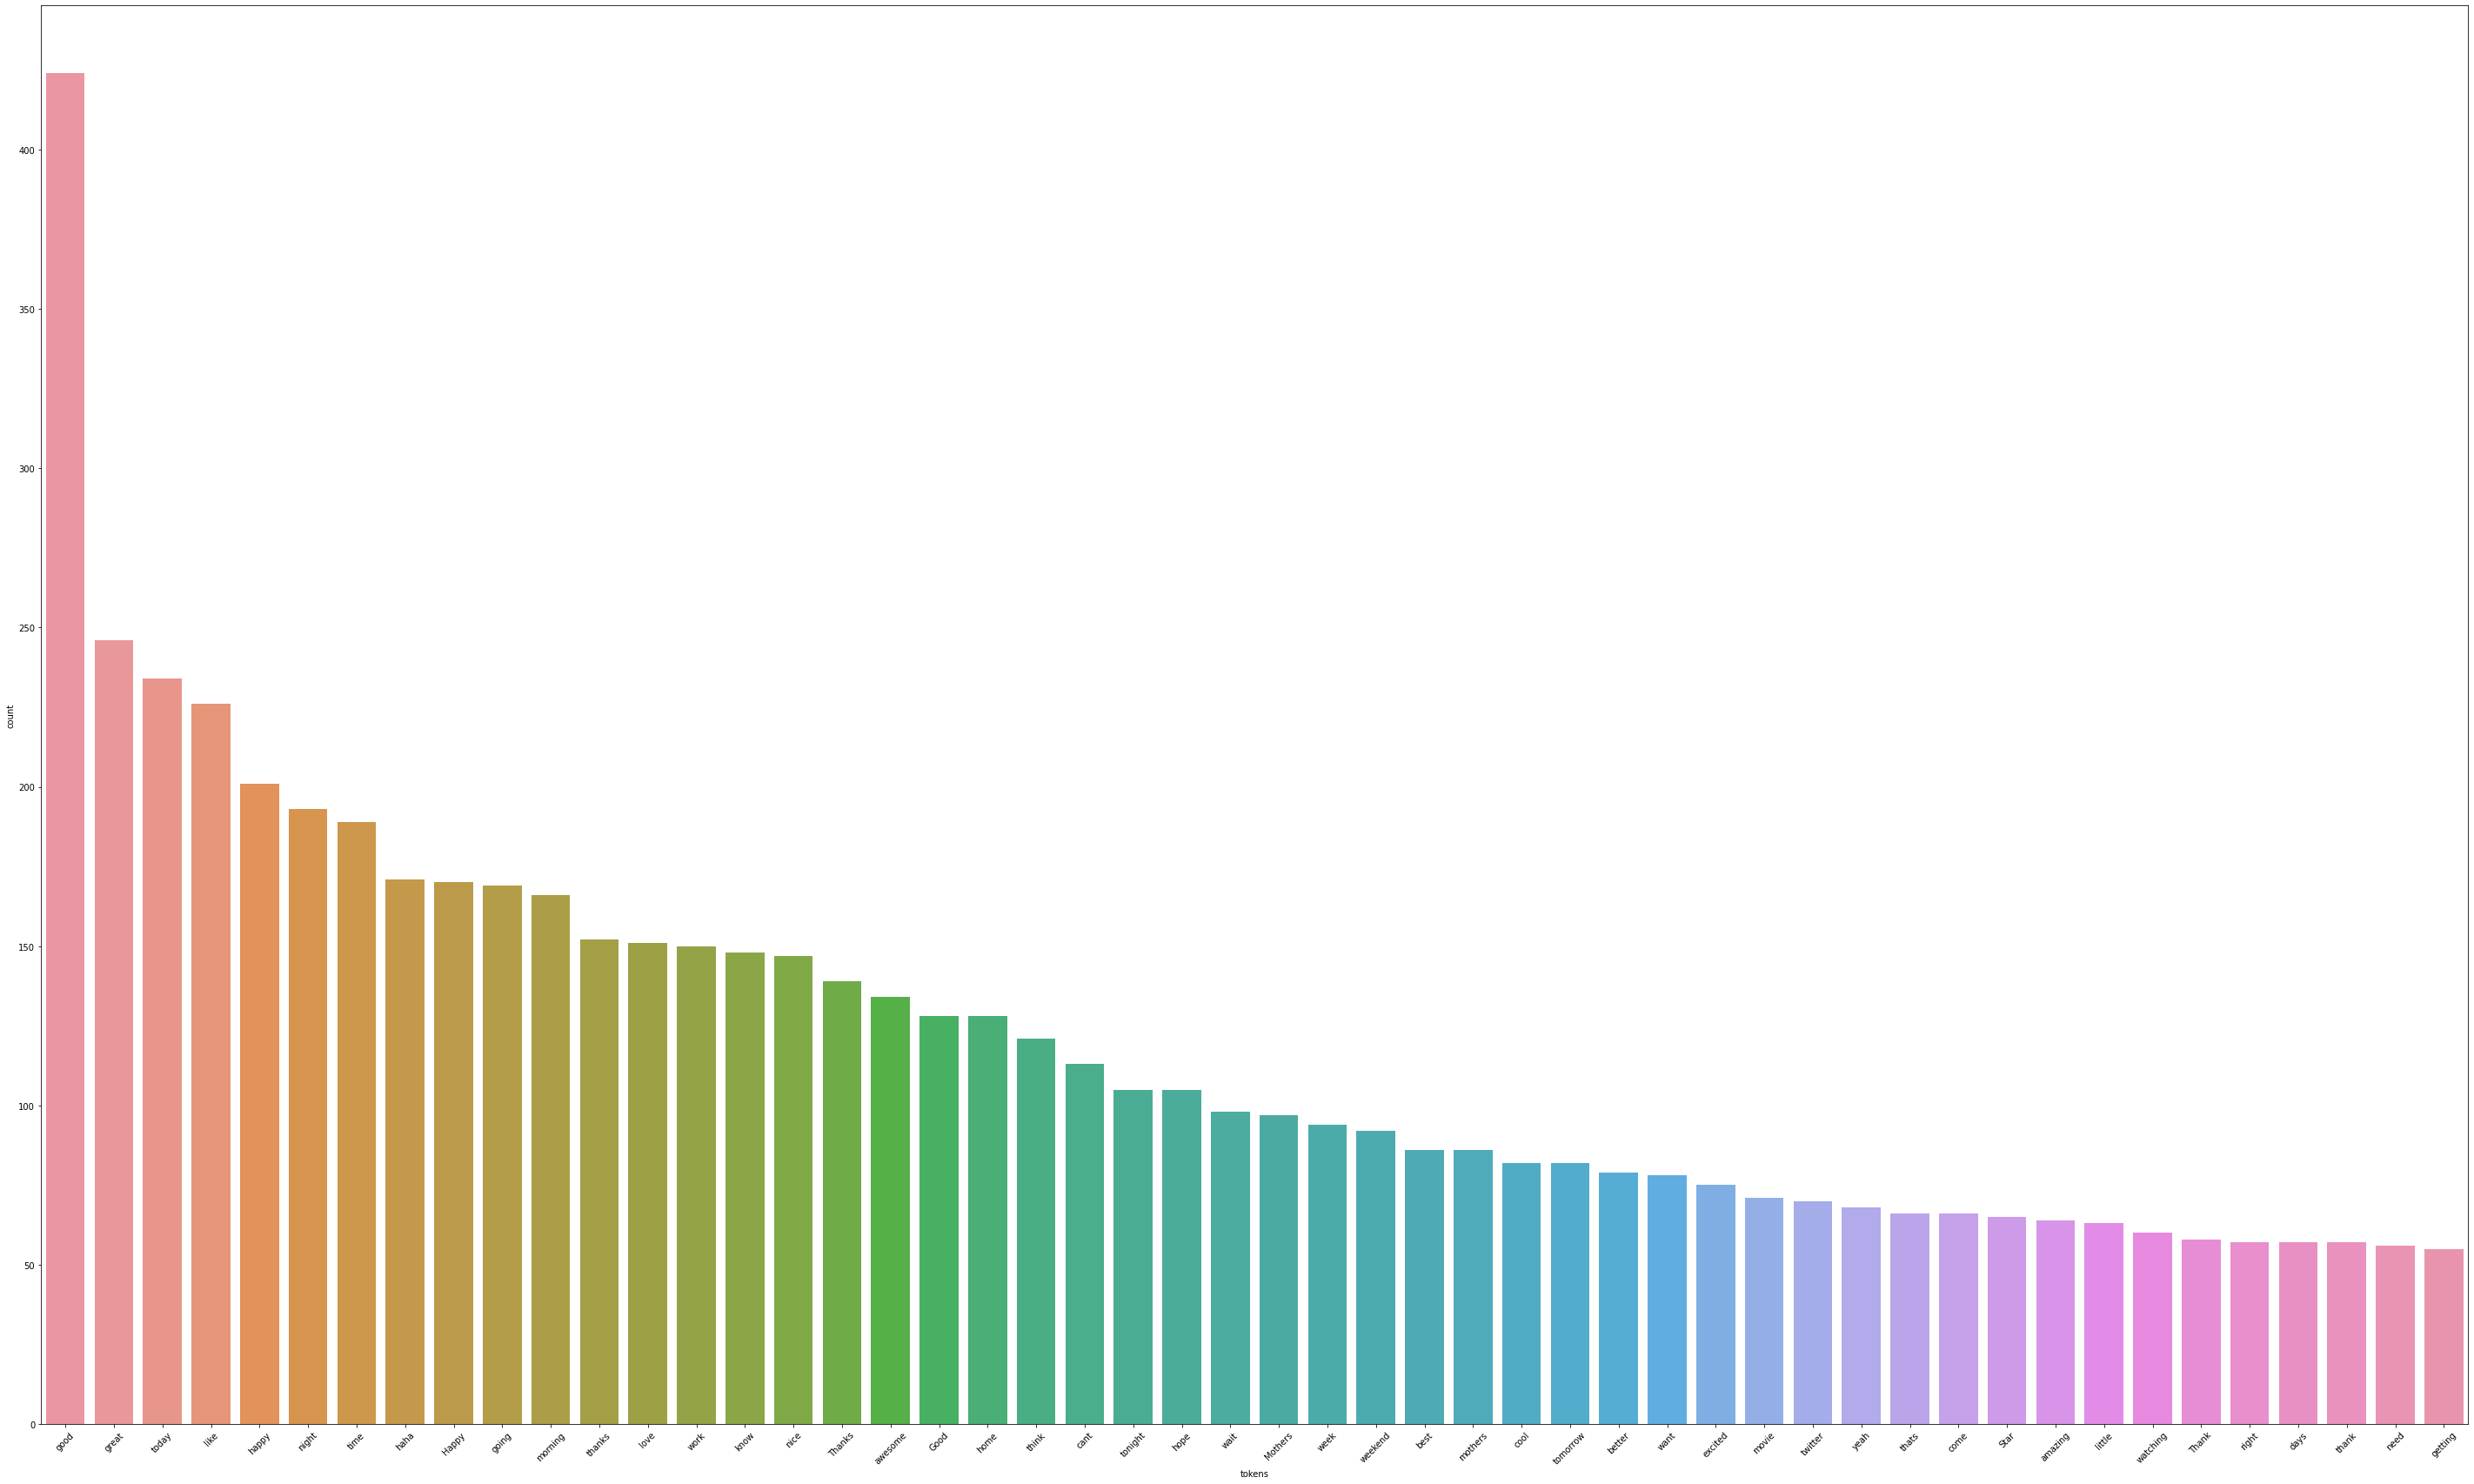

In [63]:
happiness_list = df[df['sentiment'] == "happiness"] ['clean_content'].tolist()
# Other Document
happiness_docx = ' '.join(happiness_list)
# Extract Keywords
keyword_happiness = extract_keywords(happiness_docx)
# We plot the most common words using the last defined function
plot_most_common_words(keyword_happiness)

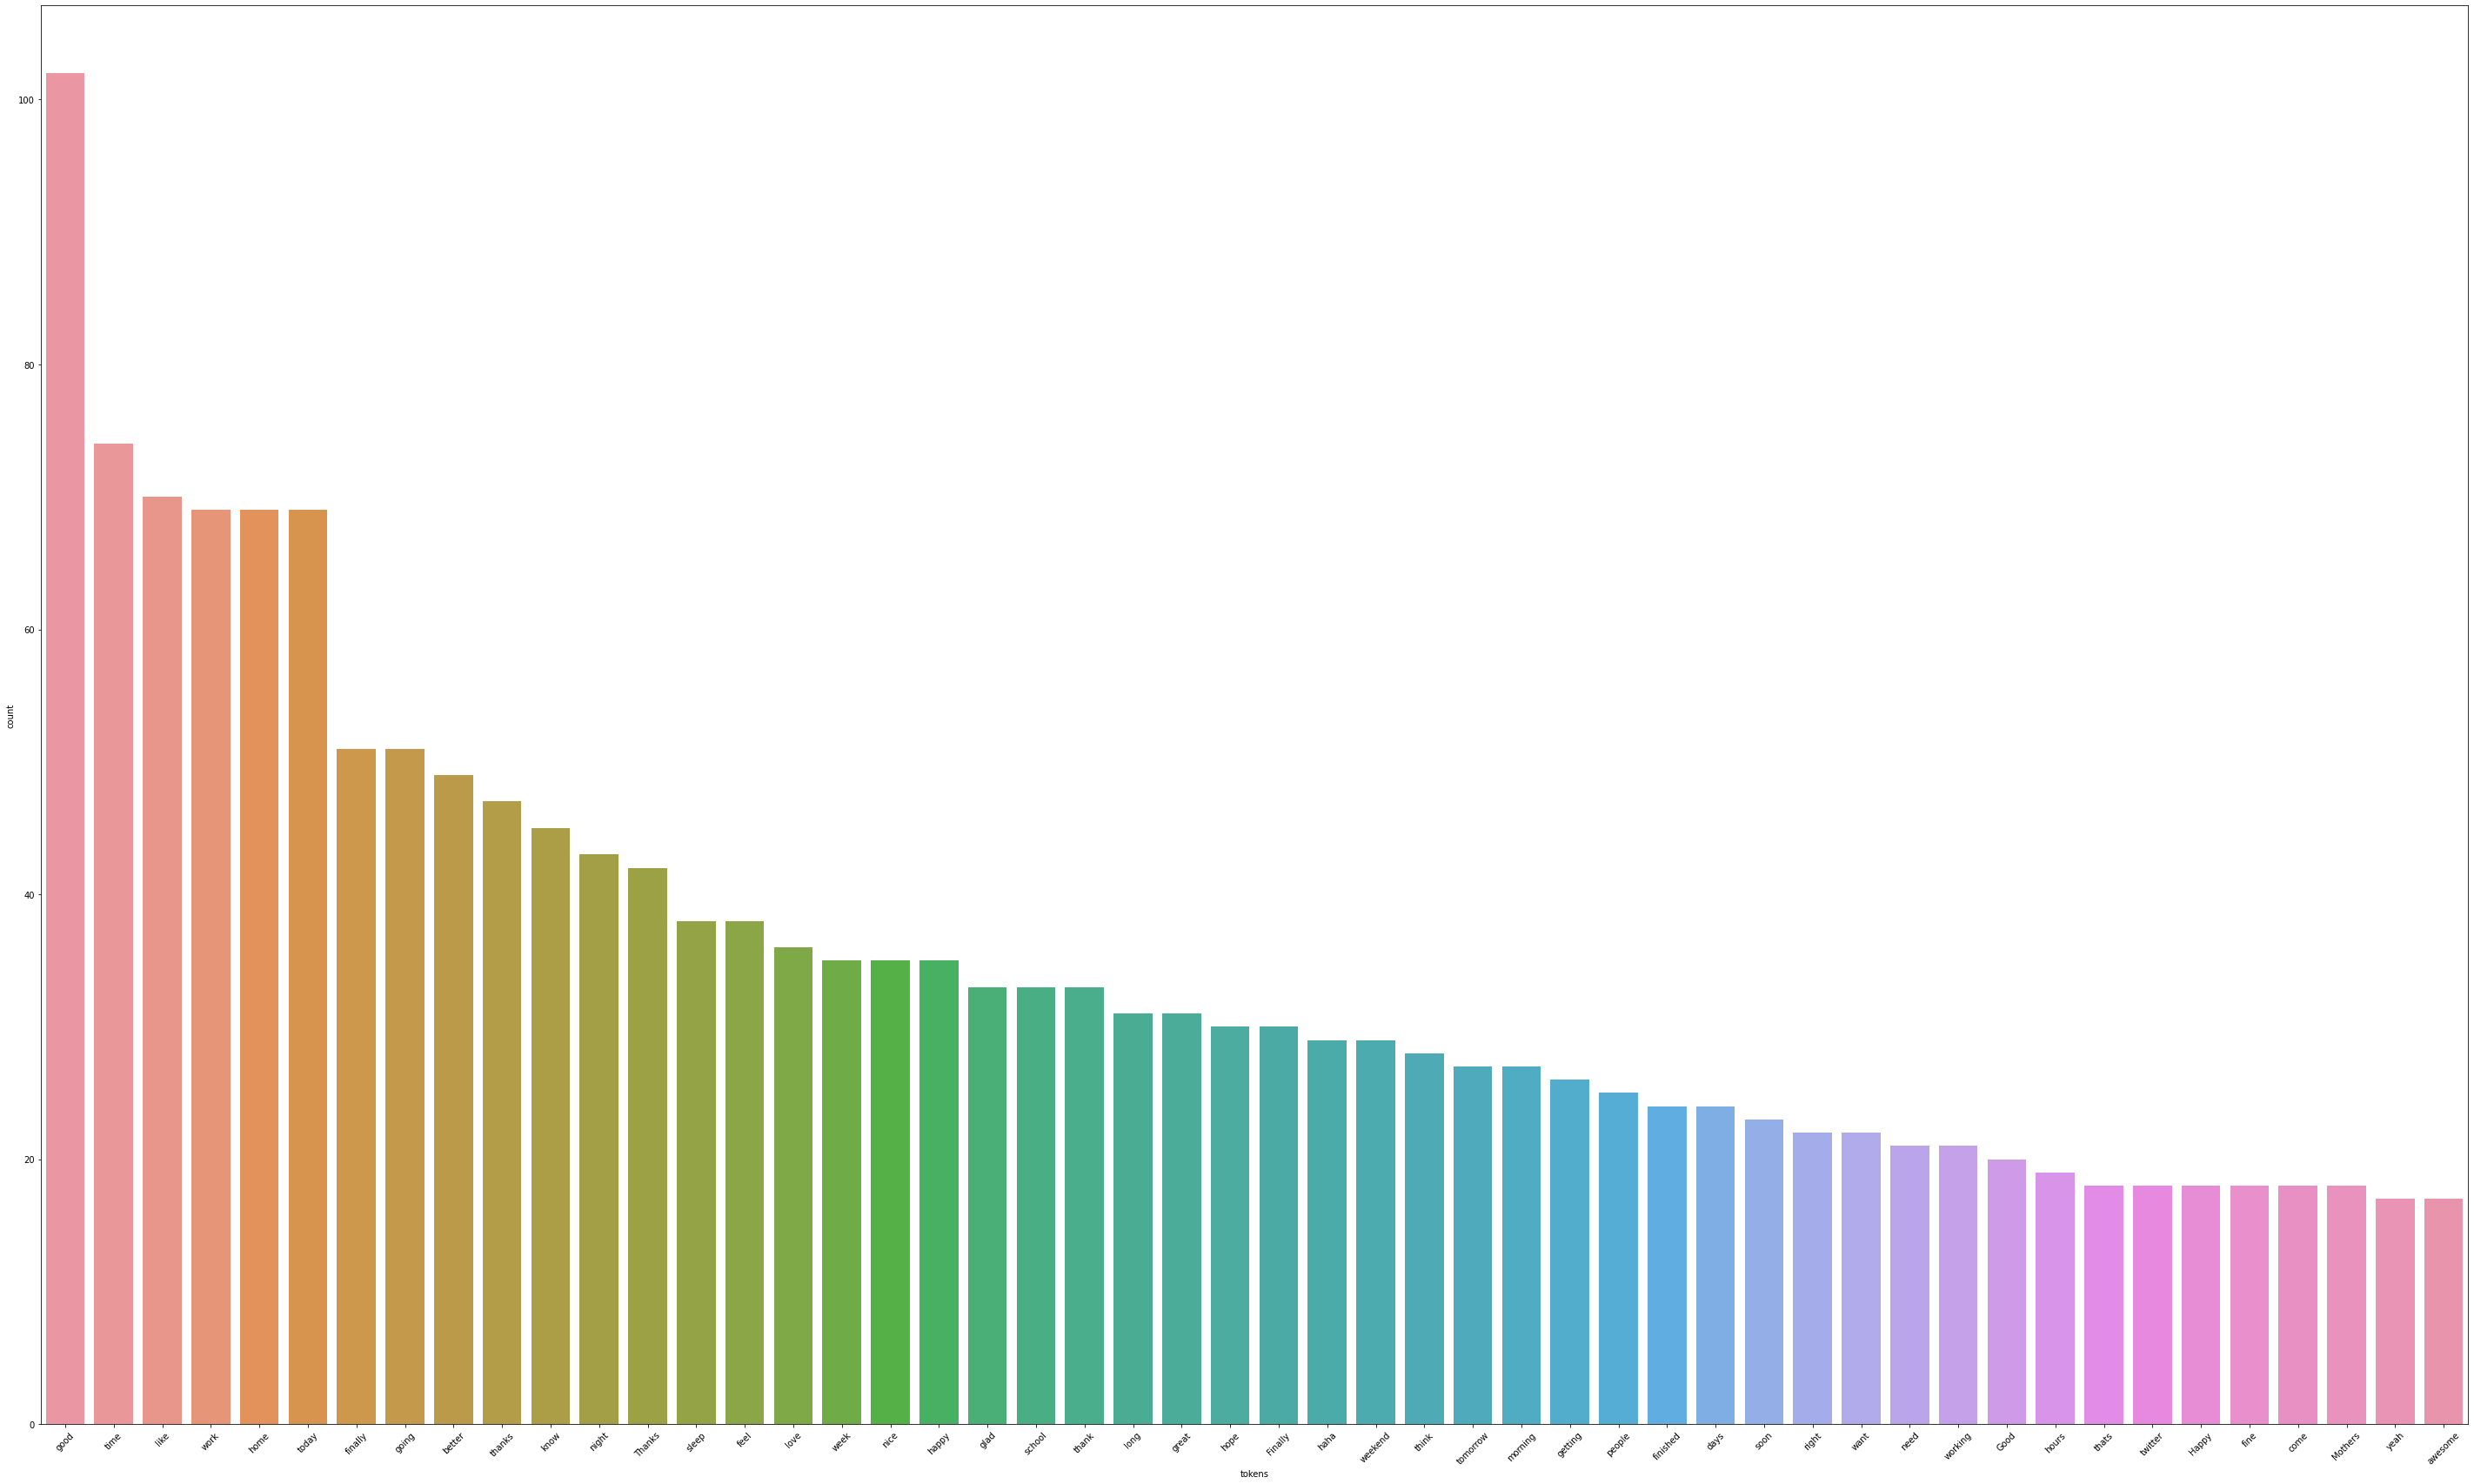

In [64]:
relief_list = df[df['sentiment'] == "relief"] ['clean_content'].tolist()
# Other Document
relief_docx = ' '.join(relief_list)
# Extract Keywords
keyword_relief = extract_keywords(relief_docx)
# We plot the most common words using the last defined function
plot_most_common_words(keyword_relief)

### We Start to Build Features From Our Text 

In [65]:
Xfeatures = df['clean_content']
ylabels = df['sentiment']

In [66]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [77]:
# Split Dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

### Build our Model

In [78]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [79]:
#Accuracy
nv_model.score(X_test,y_test)

0.3105

In [72]:
# LogisticRegresion
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

c:\users\mt\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
# Accuracy
lr_model.score(X_test,y_test)

0.32116666666666666

In [81]:
# Predictions
y_pred_for_nv = nv_model.predict(X_test)

In [82]:
df1 = pd.read_csv("meta_nc.csv")
df2 = pd.read_csv("climate-pp.csv")

In [83]:
df1.head()

,DocText,DocDate
0,Facebook doesn’t have a great rep when it come...,2021-10-28 23:59:52
1,Wasn’t Meta a superhero in one of the Pixar mo...,2021-10-28 23:59:51
2,Not that it will lead anywhere but the idea be...,2021-10-28 23:59:27
3,Zuckerburg changing FB to Meta just confirms w...,2021-10-28 23:59:23
4,Everytime i open twitter now i see a headline ...,2021-10-28 23:58:55


In [84]:
df1_text = df1['DocText']

In [87]:
# We first remove userhandles
df1['clean_content']=df1['DocText'].apply(nfx.remove_userhandles)
# We remove urls
df1['clean_content'] = df1['DocText'].apply(nfx.remove_urls)
# We then remove stopwords
df1['clean_content'] = df1['DocText'].apply(nfx.remove_stopwords)
# We also remove punctuations
df1['clean_content'] = df1['DocText'].apply(nfx.remove_punctuations)
# We remove hashtags
df1['clean_content'] = df1['DocText'].apply(nfx.remove_hashtags)
# We remove hashtags
df1['clean_content'] = df1['DocText'].apply(nfx.remove_shortwords)

In [88]:
df1.head()

,DocText,DocDate,clean_content
0,Facebook doesn’t have a great rep when it come...,2021-10-28 23:59:52,Facebook doesn have great when comes data chan...
1,Wasn’t Meta a superhero in one of the Pixar mo...,2021-10-28 23:59:51,Wasn Meta superhero Pixar movies Meta
2,Not that it will lead anywhere but the idea be...,2021-10-28 23:59:27,that will lead anywhere idea behind meta just ...
3,Zuckerburg changing FB to Meta just confirms w...,2021-10-28 23:59:23,Zuckerburg changing Meta just confirms what be...
4,Everytime i open twitter now i see a headline ...,2021-10-28 23:58:55,Everytime open twitter headline saying Faceboo...


In [103]:
list_of_emotions = []
list_of_text = []

for i in range(len(df1)):
    sample_text = df1['clean_content'][i]
    list_of_text.append(sample_text)
    vect = cv.transform(list_of_text).toarray()
    list_of_emotions.append(lr_model.predict(vect))

In [113]:
# for _ in range(len(list_of_text)):
#     print(list_of_emotions[_])
print(list_of_emotions[-1])

['neutral' 'neutral' 'other' ... 'neutral' 'surprise' 'neutral']


In [116]:
df1["emotions"] = list_of_emotions[-1]

In [117]:
df1.head()

,DocText,DocDate,clean_content,emotions
0,Facebook doesn’t have a great rep when it come...,2021-10-28 23:59:52,Facebook doesn have great when comes data chan...,neutral
1,Wasn’t Meta a superhero in one of the Pixar mo...,2021-10-28 23:59:51,Wasn Meta superhero Pixar movies Meta,neutral
2,Not that it will lead anywhere but the idea be...,2021-10-28 23:59:27,that will lead anywhere idea behind meta just ...,other
3,Zuckerburg changing FB to Meta just confirms w...,2021-10-28 23:59:23,Zuckerburg changing Meta just confirms what be...,worry
4,Everytime i open twitter now i see a headline ...,2021-10-28 23:58:55,Everytime open twitter headline saying Faceboo...,other


In [119]:
df2_text = df2['DocText']

In [121]:
# We first remove userhandles
df2['clean_content']=df2['DocText'].apply(nfx.remove_userhandles)
# We remove urls
df2['clean_content'] = df2['DocText'].apply(nfx.remove_urls)
# We then remove stopwords
df2['clean_content'] = df2['DocText'].apply(nfx.remove_stopwords)
# We also remove punctuations
df2['clean_content'] = df2['DocText'].apply(nfx.remove_punctuations)
# We remove hashtags
df2['clean_content'] = df2['DocText'].apply(nfx.remove_hashtags)
# We remove hashtags
df2['clean_content'] = df2['DocText'].apply(nfx.remove_shortwords)

In [123]:
df2.head()

,DocText,DocDate,clean_content
0,400 private jets too the climate change summit...,2021-11-02 23:23:58,private jets climate change summit amazing
1,“Covid” restrictions are so much like “Climate...,2021-11-02 23:22:22,Covid restrictions much like Climate Change re...
2,Thank you to everybody who made this a success...,2021-11-02 23:09:11,Thank everybody made this successful bookbirth...
3,anti-climate change **** deserve love and respect,2021-11-02 22:27:22,anti climate change deserve love respect
4,Very alarming ang effects ng climate change es...,2021-11-02 22:26:23,Very alarming effects climate change especiall...


In [125]:
list_of_emotions2 = []
list_of_text2 = []

for i in range(len(df2)):
    sample_text = df2['clean_content'][i]
    list_of_text2.append(sample_text)
    vect = cv.transform(list_of_text2).toarray()
    list_of_emotions2.append(lr_model.predict(vect))

In [126]:
df2["emotions"] = list_of_emotions2[-1]

In [127]:
df2.head()

,DocText,DocDate,clean_content,emotions
0,400 private jets too the climate change summit...,2021-11-02 23:23:58,private jets climate change summit amazing,neutral
1,“Covid” restrictions are so much like “Climate...,2021-11-02 23:22:22,Covid restrictions much like Climate Change re...,neutral
2,Thank you to everybody who made this a success...,2021-11-02 23:09:11,Thank everybody made this successful bookbirth...,love
3,anti-climate change **** deserve love and respect,2021-11-02 22:27:22,anti climate change deserve love respect,love
4,Very alarming ang effects ng climate change es...,2021-11-02 22:26:23,Very alarming effects climate change especiall...,neutral


In [128]:
df1.to_csv('meta_nc1.csv', index=False)

In [129]:
df2.to_csv('climate-pp.csv', index=False)